In [1]:
import numpy as np
import pandas as pd
import warnings
import csv
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "MS Gothic"
pd.get_option("display.max_columns")
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv("df_delayed.csv")

In [3]:
df

Flop_Turn  Over  Top  Top~Mid  Mid  Bot  Under  Pair  Straight  Flush  \
0         AAAA     0    1        0    0    1      0     1         0      0   
1         AAAH     0    0        1    0    0      1     0         1      0   
2         AAAL     0    0        1    0    0      1     0         0      0   
3         AAAM     0    0        1    0    0      1     0         0      0   
4         AAAU     0    0        1    0    0      1     0         0      0   
...        ...   ...  ...      ...  ...  ...    ...   ...       ...    ...   
2289      UUUU     0    1        0    0    0      0     1         0      0   
2290      UUUU     0    1        0    1    0      0     1         0      0   
2291      UUUU     0    1        0    1    0      0     1         0      0   
2292      UUUU     0    1        0    1    1      0     1         0      0   
2293      UUUU     1    0        0    0    0      0     0         0      0   

      ...       IP EV      IP EQR      130%  BET 130 EV       75%   BET 75 EV  \
0     ...  355.891000  109.332000  0.010000  353.200000  0.770000  378.290000   
1     ...  336.969083  108.674333  0.249167  385.768333  1.099167  371.935000   
2     ...  331.300563  109.286750  0.323125  366.003750  3.302500  370.393750   
3     ...  327.751250  109.167000  0.397500  373.522500  2.151667  371.877500   
4     ...  325.045500  109.530500  0.322500  380.460000  2.137500  381.432500   
...   ...         ...         ...       ...         ...       ...         ...   
2289  ...  327.013333  112.027333  0.683333  368.820000  8.356667  385.946667   
2290  ...  349.400000  109.693000  0.110000  360.090000  0.400000  354.280000   
2291  ...  346.970000  107.912500  0.115000  356.065000  0.435000  359.835000   
2292  ...  344.220500  111.544000  0.050000  345.465000  2.320000  367.210000   
2293  ...  332.220750  110.633250  0.172500  364.422500  4.212500  380.285000   

            40%   BET 40 EV      check    CHECK EV  
0     44.670000  376.960000  54.540000  338.320000  
1     47.394167  361.172500  51.263333  314.601667  
2     48.881875  364.265625  47.489375  294.417500  
3     49.676667  362.703333  47.775000  288.914167  
4     49.567500  357.685000  47.975000  288.425000  
...         ...         ...        ...         ...  
2289  40.156667  360.883333  50.800000  290.036667  
2290  69.260000  362.710000  30.230000  318.810000  
2291  64.820000  363.160000  34.635000  316.650000  
2292  46.290000  361.615000  51.340000  327.395000  
2293  49.655000  364.662500  45.957500  292.622500  

[2294 rows x 27 columns]

In [4]:
df=df.set_index("Flop_Turn")

In [5]:
df

Over  Top  Top~Mid  Mid  Bot  Under  Pair  Straight  Flush  Rag  \
Flop_Turn                                                                    
AAAA          0    1        0    0    1      0     1         0      0    0   
AAAH          0    0        1    0    0      1     0         1      0    0   
AAAL          0    0        1    0    0      1     0         0      0    0   
AAAM          0    0        1    0    0      1     0         0      0    0   
AAAU          0    0        1    0    0      1     0         0      0    0   
...         ...  ...      ...  ...  ...    ...   ...       ...    ...  ...   
UUUU          0    1        0    0    0      0     1         0      0    0   
UUUU          0    1        0    1    0      0     1         0      0    0   
UUUU          0    1        0    1    0      0     1         0      0    0   
UUUU          0    1        0    1    1      0     1         0      0    0   
UUUU          1    0        0    0    0      0     0         0      0    0   

           ...       IP EV      IP EQR      130%  BET 130 EV       75%  \
Flop_Turn  ...                                                           
AAAA       ...  355.891000  109.332000  0.010000  353.200000  0.770000   
AAAH       ...  336.969083  108.674333  0.249167  385.768333  1.099167   
AAAL       ...  331.300563  109.286750  0.323125  366.003750  3.302500   
AAAM       ...  327.751250  109.167000  0.397500  373.522500  2.151667   
AAAU       ...  325.045500  109.530500  0.322500  380.460000  2.137500   
...        ...         ...         ...       ...         ...       ...   
UUUU       ...  327.013333  112.027333  0.683333  368.820000  8.356667   
UUUU       ...  349.400000  109.693000  0.110000  360.090000  0.400000   
UUUU       ...  346.970000  107.912500  0.115000  356.065000  0.435000   
UUUU       ...  344.220500  111.544000  0.050000  345.465000  2.320000   
UUUU       ...  332.220750  110.633250  0.172500  364.422500  4.212500   

            BET 75 EV        40%   BET 40 EV      check    CHECK EV  
Flop_Turn                                                            
AAAA       378.290000  44.670000  376.960000  54.540000  338.320000  
AAAH       371.935000  47.394167  361.172500  51.263333  314.601667  
AAAL       370.393750  48.881875  364.265625  47.489375  294.417500  
AAAM       371.877500  49.676667  362.703333  47.775000  288.914167  
AAAU       381.432500  49.567500  357.685000  47.975000  288.425000  
...               ...        ...         ...        ...         ...  
UUUU       385.946667  40.156667  360.883333  50.800000  290.036667  
UUUU       354.280000  69.260000  362.710000  30.230000  318.810000  
UUUU       359.835000  64.820000  363.160000  34.635000  316.650000  
UUUU       367.210000  46.290000  361.615000  51.340000  327.395000  
UUUU       380.285000  49.655000  364.662500  45.957500  292.622500  

[2294 rows x 26 columns]

In [6]:
df.isnull().sum()

Over          0
Top           0
Top~Mid       0
Mid           0
Bot           0
Under         0
Pair          0
Straight      0
Flush         0
Rag           0
色             0
ボード           0
OOP Equity    0
OOP EV        0
OOP EQR       0
IP Equity     0
IP EV         0
IP EQR        0
130%          0
BET 130 EV    0
75%           0
BET 75 EV     0
40%           0
BET 40 EV     0
check         0
CHECK EV      0
dtype: int64

In [7]:
one_hot_df=pd.get_dummies(df)

In [8]:
one_hot_df

Over  Top  Top~Mid  Mid  Bot  Under  Pair  Straight  Flush  Rag  \
Flop_Turn                                                                    
AAAA          0    1        0    0    1      0     1         0      0    0   
AAAH          0    0        1    0    0      1     0         1      0    0   
AAAL          0    0        1    0    0      1     0         0      0    0   
AAAM          0    0        1    0    0      1     0         0      0    0   
AAAU          0    0        1    0    0      1     0         0      0    0   
...         ...  ...      ...  ...  ...    ...   ...       ...    ...  ...   
UUUU          0    1        0    0    0      0     1         0      0    0   
UUUU          0    1        0    1    0      0     1         0      0    0   
UUUU          0    1        0    1    0      0     1         0      0    0   
UUUU          0    1        0    1    1      0     1         0      0    0   
UUUU          1    0        0    0    0      0     0         0      0    0   

           ...        40%   BET 40 EV      check    CHECK EV  色_ツートーン  \
Flop_Turn  ...                                                          
AAAA       ...  44.670000  376.960000  54.540000  338.320000        0   
AAAH       ...  47.394167  361.172500  51.263333  314.601667        0   
AAAL       ...  48.881875  364.265625  47.489375  294.417500        0   
AAAM       ...  49.676667  362.703333  47.775000  288.914167        0   
AAAU       ...  49.567500  357.685000  47.975000  288.425000        0   
...        ...        ...         ...        ...         ...      ...   
UUUU       ...  40.156667  360.883333  50.800000  290.036667        0   
UUUU       ...  69.260000  362.710000  30.230000  318.810000        1   
UUUU       ...  64.820000  363.160000  34.635000  316.650000        0   
UUUU       ...  46.290000  361.615000  51.340000  327.395000        0   
UUUU       ...  49.655000  364.662500  45.957500  292.622500        0   

           色_モノトーン  色_レインボー  ボード_トリップス  ボード_ペアなし  ボード_ペアボード  
Flop_Turn                                                    
AAAA             0        1          1         0          0  
AAAH             0        1          1         0          0  
AAAL             0        1          1         0          0  
AAAM             0        1          1         0          0  
AAAU             0        1          1         0          0  
...            ...      ...        ...       ...        ...  
UUUU             0        1          0         0          1  
UUUU             0        0          0         0          1  
UUUU             0        1          0         0          1  
UUUU             0        1          1         0          0  
UUUU             0        1          1         0          0  

[2294 rows x 30 columns]

In [9]:
one_hot_df.to_csv("df1.csv",encoding='utf_8_sig')

In [10]:
df1=one_hot_df.copy()

In [11]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=1)
model.fit(df1)


KMeans(n_clusters=5, random_state=1)

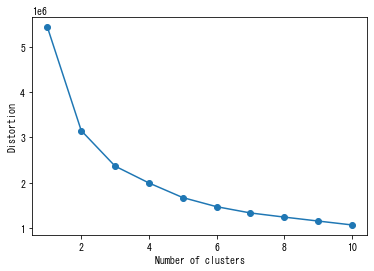

In [12]:

distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df1)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [13]:
cluster = model.labels_

In [14]:
df1["cluster"]=cluster

In [15]:
df1.groupby('cluster').mean().style.bar(axis=0)

In [16]:
import matplotlib.pyplot as plt

In [17]:
df2=df1.copy()

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca.fit(df2)
feature = pca.transform(df2)

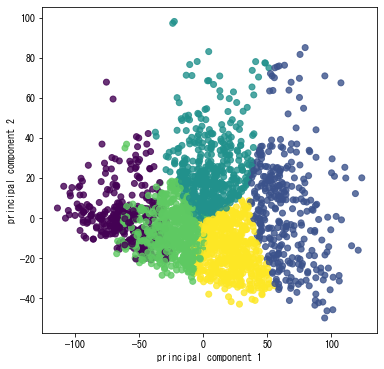

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=cluster)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [20]:
df_4=df2[df2["cluster"]==4]

In [21]:
df_3=df2[df2["cluster"]==3]

In [22]:
df_2=df2[df2["cluster"]==2]

In [23]:
df_1=df2[df2["cluster"]==1]

In [24]:
df_0=df2[df2["cluster"]==0]

In [25]:
df_4

Over  Top  Top~Mid  Mid  Bot  Under  Pair  Straight  Flush  Rag  \
Flop_Turn                                                                    
AHHA          0    1        0    0    0      0     1         0      0    0   
AHHA          0    1        0    0    0      0     1         0      1    0   
AHHH          0    0        0    0    0      1     0         1      1    0   
AHHH          0    0        0    0    1      0     1         0      0    0   
AHHH          0    0        0    0    1      0     1         0      0    0   
...         ...  ...      ...  ...  ...    ...   ...       ...    ...  ...   
UUUH          1    0        0    0    0      0     0         1      1    0   
UUUL          0    0        0    0    0      1     0         0      1    0   
UUUM          0    0        0    0    0      1     0         1      0    0   
UUUM          0    0        0    0    0      1     0         1      0    0   
UUUM          0    0        0    0    0      1     0         1      1    0   

           ...   BET 40 EV      check    CHECK EV  色_ツートーン  色_モノトーン  色_レインボー  \
Flop_Turn  ...                                                                 
AHHA       ...  360.406667  54.440000  286.820000        0        1        0   
AHHA       ...  369.676667  60.316667  288.486667        1        0        0   
AHHH       ...  371.113333  58.733333  295.406667        1        0        0   
AHHH       ...  355.506250  64.029583  296.759583        1        0        0   
AHHH       ...  371.526667  63.620000  286.300000        0        1        0   
...        ...         ...        ...         ...      ...      ...      ...   
UUUH       ...  370.221667  56.683333  289.048333        1        0        0   
UUUL       ...  367.568750  54.037500  295.146250        1        0        0   
UUUM       ...  369.160556  51.372778  283.145556        1        0        0   
UUUM       ...  366.565833  52.002917  285.141250        0        0        1   
UUUM       ...  365.720000  57.435000  275.475000        1        0        0   

           ボード_トリップス  ボード_ペアなし  ボード_ペアボード  cluster  
Flop_Turn                                           
AHHA               0         1          0        4  
AHHA               0         1          0        4  
AHHH               0         0          1        4  
AHHH               0         1          0        4  
AHHH               0         1          0        4  
...              ...       ...        ...      ...  
UUUH               0         0          1        4  
UUUL               0         0          1        4  
UUUM               0         0          1        4  
UUUM               0         0          1        4  
UUUM               0         0          1        4  

[584 rows x 31 columns]

In [26]:
df2.mean()

Over            0.209241
Top             0.077158
Top~Mid         0.214473
Mid             0.073235
Bot             0.077158
Under           0.227986
Pair            0.202703
Straight        0.431997
Flush           0.335222
Rag             0.105493
OOP Equity     43.349959
OOP EV        185.702269
OOP EQR        85.518056
IP Equity      56.650038
IP EV         314.297929
IP EQR        110.993855
130%            3.390951
BET 130 EV    398.702600
75%            10.875280
BET 75 EV     382.095705
40%            27.912966
BET 40 EV     357.420324
check          57.820743
CHECK EV      275.876855
色_ツートーン         0.480384
色_モノトーン         0.252398
色_レインボー         0.267219
ボード_トリップス       0.014821
ボード_ペアなし        0.687881
ボード_ペアボード       0.297297
cluster         2.343069
dtype: float64

In [27]:
df_4.mean()

Over            0.243151
Top             0.020548
Top~Mid         0.200342
Mid             0.041096
Bot             0.097603
Under           0.186644
Pair            0.159247
Straight        0.368151
Flush           0.265411
Rag             0.169521
OOP Equity     41.596683
OOP EV        177.017794
OOP EQR        85.083292
IP Equity      58.403316
IP EV         322.982534
IP EQR        110.613951
130%            6.265504
BET 130 EV    411.788487
75%            12.570692
BET 75 EV     391.274913
40%            20.861100
BET 40 EV     364.169126
check          60.302677
CHECK EV      285.032160
色_ツートーン         0.549658
色_モノトーン         0.176370
色_レインボー         0.273973
ボード_トリップス       0.000000
ボード_ペアなし        0.779110
ボード_ペアボード       0.220890
cluster         4.000000
dtype: float64

In [28]:
df_3.mean()

Over            0.263066
Top             0.013937
Top~Mid         0.287456
Mid             0.017422
Bot             0.029617
Under           0.203833
Pair            0.059233
Straight        0.592334
Flush           0.379791
Rag             0.076655
OOP Equity     45.865776
OOP EV        197.724162
OOP EQR        86.196189
IP Equity      54.134223
IP EV         302.275707
IP EQR        111.687241
130%            3.352123
BET 130 EV    394.785550
75%            18.946372
BET 75 EV     379.211538
40%            17.252396
BET 40 EV     355.073372
check          60.449035
CHECK EV      257.879353
色_ツートーン         0.581882
色_モノトーン         0.229965
色_レインボー         0.188153
ボード_トリップス       0.000000
ボード_ペアなし        0.850174
ボード_ペアボード       0.149826
cluster         3.000000
dtype: float64

In [29]:
df_2.mean()

Over            0.122244
Top             0.216433
Top~Mid         0.108216
Mid             0.202405
Bot             0.128257
Under           0.224449
Pair            0.468938
Straight        0.234469
Flush           0.164329
Rag             0.110220
OOP Equity     42.648121
OOP EV        181.222747
OOP EQR        84.970942
IP Equity      57.351877
IP EV         318.779520
IP EQR        111.185460
130%            0.964788
BET 130 EV    382.111630
75%             7.406088
BET 75 EV     377.988605
40%            39.893703
BET 40 EV     358.829158
check          51.735426
CHECK EV      277.881850
色_ツートーン         0.466934
色_モノトーン         0.170341
色_レインボー         0.362725
ボード_トリップス       0.058116
ボード_ペアなし        0.426854
ボード_ペアボード       0.515030
cluster         2.000000
dtype: float64

In [30]:
df_1.mean()

Over            0.159875
Top             0.153605
Top~Mid         0.235110
Mid             0.103448
Bot             0.122257
Under           0.329154
Pair            0.326019
Straight        0.294671
Flush           0.156740
Rag             0.137931
OOP Equity     37.209563
OOP EV        153.982976
OOP EQR        82.725354
IP Equity      62.790427
IP EV         346.014349
IP EQR        110.228518
130%            3.224351
BET 130 EV    407.299304
75%             6.610087
BET 75 EV     395.342530
40%            39.325118
BET 40 EV     374.213696
check          50.840225
CHECK EV      313.222536
色_ツートーン         0.532915
色_モノトーン         0.000000
色_レインボー         0.467085
ボード_トリップス       0.015674
ボード_ペアなし        0.326019
ボード_ペアボード       0.658307
cluster         1.000000
dtype: float64

In [31]:
df_0.mean()

Over            0.235849
Top             0.000000
Top~Mid         0.254717
Mid             0.000000
Bot             0.000000
Under           0.251572
Pair            0.000000
Straight        0.707547
Flush           0.830189
Rag             0.000000
OOP Equity     49.289705
OOP EV        218.799444
OOP EQR        88.752443
IP Equity      50.710294
IP EV         281.200741
IP EQR        110.907040
130%            2.156200
BET 130 EV    399.151572
75%             2.915519
BET 75 EV     363.600614
40%            29.858229
BET 40 EV     330.205720
check          65.070017
CHECK EV      250.940077
色_ツートーン         0.138365
色_モノトーン         0.814465
色_レインボー         0.047170
ボード_トリップス       0.000000
ボード_ペアなし        1.000000
ボード_ペアボード       0.000000
cluster         0.000000
dtype: float64

In [32]:
df2=df2.drop("cluster",axis=1)

In [33]:
df2.columns

Index(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag', 'OOP Equity', 'OOP EV', 'OOP EQR', 'IP Equity', 'IP EV',
       'IP EQR', '130%', 'BET 130 EV', '75%', 'BET 75 EV', '40%', 'BET 40 EV',
       'check', 'CHECK EV', '色_ツートーン', '色_モノトーン', '色_レインボー', 'ボード_トリップス',
       'ボード_ペアなし', 'ボード_ペアボード'],
      dtype='object')

In [34]:
df2=df2.drop(['BET 130 EV','BET 75 EV', 'BET 40 EV',
       'CHECK EV'],axis=1)

In [35]:
df2=df2.drop(['OOP Equity', 'OOP EV', 'OOP EQR', 'IP Equity', 'IP EV',
       'IP EQR'],axis=1)

In [36]:
df2.columns

Index(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag', '130%', '75%', '40%', 'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード'],
      dtype='object')

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
x_standardized = scaler.fit_transform(df2)
df_x_standardized = pd.DataFrame(x_standardized, 
                                 columns=df2.columns,
                                index=df2.index)


In [40]:
df_x_standardized

Over       Top   Top~Mid       Mid       Bot     Under  \
Flop_Turn                                                               
AAAA      -0.514401  3.458389 -0.522523 -0.281108  3.458389 -0.543427   
AAAH      -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172   
AAAL      -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172   
AAAM      -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172   
AAAU      -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172   
...             ...       ...       ...       ...       ...       ...   
UUUU      -0.514401  3.458389 -0.522523 -0.281108 -0.289152 -0.543427   
UUUU      -0.514401  3.458389 -0.522523  3.557353 -0.289152 -0.543427   
UUUU      -0.514401  3.458389 -0.522523  3.557353 -0.289152 -0.543427   
UUUU      -0.514401  3.458389 -0.522523  3.557353  3.458389 -0.543427   
UUUU       1.944008 -0.289152 -0.522523 -0.281108 -0.289152 -0.543427   

               Pair  Straight     Flush       Rag      130%       75%  \
Flop_Turn                                                               
AAAA       1.983263 -0.872097 -0.710114 -0.343415 -0.884679 -1.205769   
AAAH      -0.504219  1.146662 -0.710114 -0.343415 -0.822098 -1.166493   
AAAL      -0.504219 -0.872097 -0.710114 -0.343415 -0.802745 -0.903589   
AAAM      -0.504219 -0.872097 -0.710114 -0.343415 -0.783284 -1.040908   
AAAU      -0.504219 -0.872097 -0.710114 -0.343415 -0.802909 -1.042598   
...             ...       ...       ...       ...       ...       ...   
UUUU       1.983263 -0.872097 -0.710114 -0.343415 -0.708491 -0.300523   
UUUU       1.983263 -0.872097 -0.710114 -0.343415 -0.858513 -1.249918   
UUUU       1.983263 -0.872097 -0.710114 -0.343415 -0.857204 -1.245742   
UUUU       1.983263 -0.872097 -0.710114 -0.343415 -0.874213 -1.020822   
UUUU      -0.504219 -0.872097 -0.710114 -0.343415 -0.842159 -0.795008   

                40%     check   色_ツートーン   色_モノトーン   色_レインボー  ボード_トリップス  \
Flop_Turn                                                                
AAAA       1.220689 -0.454821 -0.961507 -0.581042  1.655974   8.152950   
AAAH       1.419135 -0.909077 -0.961507 -0.581042  1.655974   8.152950   
AAAL       1.527509 -1.432274 -0.961507 -0.581042  1.655974   8.152950   
AAAM       1.585407 -1.392676 -0.961507 -0.581042  1.655974   8.152950   
AAAU       1.577455 -1.364950 -0.961507 -0.581042  1.655974   8.152950   
...             ...       ...       ...       ...       ...        ...   
UUUU       0.891909 -0.973310 -0.961507 -0.581042  1.655974  -0.122655   
UUUU       3.011982 -3.825001  1.040034 -0.581042 -0.603874  -0.122655   
UUUU       2.688544 -3.214320 -0.961507 -0.581042  1.655974  -0.122655   
UUUU       1.338700 -0.898448 -0.961507 -0.581042  1.655974   8.152950   
UUUU       1.583829 -1.644643 -0.961507 -0.581042  1.655974   8.152950   

           ボード_ペアなし  ボード_ペアボード  
Flop_Turn                       
AAAA      -1.484557  -0.650444  
AAAH      -1.484557  -0.650444  
AAAL      -1.484557  -0.650444  
AAAM      -1.484557  -0.650444  
AAAU      -1.484557  -0.650444  
...             ...        ...  
UUUU      -1.484557   1.537412  
UUUU      -1.484557   1.537412  
UUUU      -1.484557   1.537412  
UUUU      -1.484557  -0.650444  
UUUU      -1.484557  -0.650444  

[2294 rows x 20 columns]

In [41]:
df3=df_x_standardized.copy()

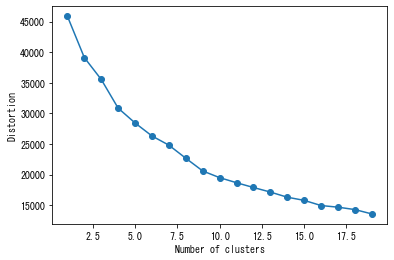

Wall time: 3.11 s


In [42]:
%%time
import matplotlib.pyplot as plt


distortions = []

for i  in range(1,20):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df3)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,20),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [43]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=10, random_state=1)
model.fit(df3)


KMeans(n_clusters=10, random_state=1)

In [44]:
cluster = model.labels_

In [45]:
cluster

array([7, 7, 7, ..., 6, 7, 7])

In [46]:
df3["cluster"]=cluster

In [47]:
df3.groupby('cluster').mean().style.bar(axis=0)

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=1)
pca.fit(df3)
feature = pca.transform(df3)

In [49]:
feature[:, 0]

array([4.8831568 , 3.53578268, 3.83824943, ..., 3.97311538, 5.42076238,
       3.88952988])

In [50]:
cluster

array([7, 7, 7, ..., 6, 7, 7])

In [51]:
df3

Over       Top   Top~Mid       Mid       Bot     Under  \
Flop_Turn                                                               
AAAA      -0.514401  3.458389 -0.522523 -0.281108  3.458389 -0.543427   
AAAH      -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172   
AAAL      -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172   
AAAM      -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172   
AAAU      -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172   
...             ...       ...       ...       ...       ...       ...   
UUUU      -0.514401  3.458389 -0.522523 -0.281108 -0.289152 -0.543427   
UUUU      -0.514401  3.458389 -0.522523  3.557353 -0.289152 -0.543427   
UUUU      -0.514401  3.458389 -0.522523  3.557353 -0.289152 -0.543427   
UUUU      -0.514401  3.458389 -0.522523  3.557353  3.458389 -0.543427   
UUUU       1.944008 -0.289152 -0.522523 -0.281108 -0.289152 -0.543427   

               Pair  Straight     Flush       Rag  ...       75%       40%  \
Flop_Turn                                          ...                       
AAAA       1.983263 -0.872097 -0.710114 -0.343415  ... -1.205769  1.220689   
AAAH      -0.504219  1.146662 -0.710114 -0.343415  ... -1.166493  1.419135   
AAAL      -0.504219 -0.872097 -0.710114 -0.343415  ... -0.903589  1.527509   
AAAM      -0.504219 -0.872097 -0.710114 -0.343415  ... -1.040908  1.585407   
AAAU      -0.504219 -0.872097 -0.710114 -0.343415  ... -1.042598  1.577455   
...             ...       ...       ...       ...  ...       ...       ...   
UUUU       1.983263 -0.872097 -0.710114 -0.343415  ... -0.300523  0.891909   
UUUU       1.983263 -0.872097 -0.710114 -0.343415  ... -1.249918  3.011982   
UUUU       1.983263 -0.872097 -0.710114 -0.343415  ... -1.245742  2.688544   
UUUU       1.983263 -0.872097 -0.710114 -0.343415  ... -1.020822  1.338700   
UUUU      -0.504219 -0.872097 -0.710114 -0.343415  ... -0.795008  1.583829   

              check   色_ツートーン   色_モノトーン   色_レインボー  ボード_トリップス  ボード_ペアなし  \
Flop_Turn                                                                
AAAA      -0.454821 -0.961507 -0.581042  1.655974   8.152950 -1.484557   
AAAH      -0.909077 -0.961507 -0.581042  1.655974   8.152950 -1.484557   
AAAL      -1.432274 -0.961507 -0.581042  1.655974   8.152950 -1.484557   
AAAM      -1.392676 -0.961507 -0.581042  1.655974   8.152950 -1.484557   
AAAU      -1.364950 -0.961507 -0.581042  1.655974   8.152950 -1.484557   
...             ...       ...       ...       ...        ...       ...   
UUUU      -0.973310 -0.961507 -0.581042  1.655974  -0.122655 -1.484557   
UUUU      -3.825001  1.040034 -0.581042 -0.603874  -0.122655 -1.484557   
UUUU      -3.214320 -0.961507 -0.581042  1.655974  -0.122655 -1.484557   
UUUU      -0.898448 -0.961507 -0.581042  1.655974   8.152950 -1.484557   
UUUU      -1.644643 -0.961507 -0.581042  1.655974   8.152950 -1.484557   

           ボード_ペアボード  cluster  
Flop_Turn                      
AAAA       -0.650444        7  
AAAH       -0.650444        7  
AAAL       -0.650444        7  
AAAM       -0.650444        7  
AAAU       -0.650444        7  
...              ...      ...  
UUUU        1.537412        6  
UUUU        1.537412        6  
UUUU        1.537412        6  
UUUU       -0.650444        7  
UUUU       -0.650444        7  

[2294 rows x 21 columns]

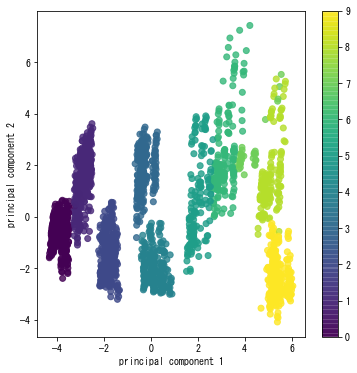

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=cluster)
plt.colorbar()
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [53]:
df2["cluster"]=cluster
df_9=df2[df2["cluster"]==9]
df_8=df2[df2["cluster"]==8]
df_7=df2[df2["cluster"]==7]
df_6=df2[df2["cluster"]==6]
df_5=df2[df2["cluster"]==5]
df_4=df2[df2["cluster"]==4]
df_3=df2[df2["cluster"]==3]
df_2=df2[df2["cluster"]==2]
df_1=df2[df2["cluster"]==1]
df_0=df2[df2["cluster"]==0]

In [54]:
df2

Over  Top  Top~Mid  Mid  Bot  Under  Pair  Straight  Flush  Rag  \
Flop_Turn                                                                    
AAAA          0    1        0    0    1      0     1         0      0    0   
AAAH          0    0        1    0    0      1     0         1      0    0   
AAAL          0    0        1    0    0      1     0         0      0    0   
AAAM          0    0        1    0    0      1     0         0      0    0   
AAAU          0    0        1    0    0      1     0         0      0    0   
...         ...  ...      ...  ...  ...    ...   ...       ...    ...  ...   
UUUU          0    1        0    0    0      0     1         0      0    0   
UUUU          0    1        0    1    0      0     1         0      0    0   
UUUU          0    1        0    1    0      0     1         0      0    0   
UUUU          0    1        0    1    1      0     1         0      0    0   
UUUU          1    0        0    0    0      0     0         0      0    0   

           ...       75%        40%      check  色_ツートーン  色_モノトーン  色_レインボー  \
Flop_Turn  ...                                                              
AAAA       ...  0.770000  44.670000  54.540000        0        0        1   
AAAH       ...  1.099167  47.394167  51.263333        0        0        1   
AAAL       ...  3.302500  48.881875  47.489375        0        0        1   
AAAM       ...  2.151667  49.676667  47.775000        0        0        1   
AAAU       ...  2.137500  49.567500  47.975000        0        0        1   
...        ...       ...        ...        ...      ...      ...      ...   
UUUU       ...  8.356667  40.156667  50.800000        0        0        1   
UUUU       ...  0.400000  69.260000  30.230000        1        0        0   
UUUU       ...  0.435000  64.820000  34.635000        0        0        1   
UUUU       ...  2.320000  46.290000  51.340000        0        0        1   
UUUU       ...  4.212500  49.655000  45.957500        0        0        1   

           ボード_トリップス  ボード_ペアなし  ボード_ペアボード  cluster  
Flop_Turn                                           
AAAA               1         0          0        7  
AAAH               1         0          0        7  
AAAL               1         0          0        7  
AAAM               1         0          0        7  
AAAU               1         0          0        7  
...              ...       ...        ...      ...  
UUUU               0         0          1        6  
UUUU               0         0          1        6  
UUUU               0         0          1        6  
UUUU               1         0          0        7  
UUUU               1         0          0        7  

[2294 rows x 21 columns]

In [55]:
df_8

Over  Top  Top~Mid  Mid  Bot  Under  Pair  Straight  Flush  Rag  \
Flop_Turn                                                                    
AHHH          0    0        0    1    0      0     1         0      0    0   
AHHH          0    0        0    1    0      0     1         0      0    0   
AHHH          0    0        0    1    0      0     1         0      0    0   
AHHH          0    0        0    1    0      0     1         0      1    0   
AHHH          0    0        0    1    1      0     1         0      0    0   
...         ...  ...      ...  ...  ...    ...   ...       ...    ...  ...   
UUMU          0    0        0    1    0      0     1         0      0    0   
UUMU          0    0        0    1    0      0     1         0      0    0   
UUMU          0    0        0    1    0      0     1         0      1    0   
UUUU          0    0        0    1    1      0     1         0      0    0   
UUUU          0    0        0    1    1      0     1         0      0    0   

           ...        75%        40%      check  色_ツートーン  色_モノトーン  色_レインボー  \
Flop_Turn  ...                                                               
AHHH       ...  12.973750  24.447917  58.683750        1        0        0   
AHHH       ...   8.283333  34.086667  55.740000        0        1        0   
AHHH       ...   7.003333  29.325556  60.030000        0        0        1   
AHHH       ...   7.473333  28.313333  60.773333        1        0        0   
AHHH       ...   0.590000  50.806667  48.420000        1        0        0   
...        ...        ...        ...        ...      ...      ...      ...   
UUMU       ...   3.823333  42.073333  53.560000        0        1        0   
UUMU       ...  15.206667  31.977778  51.866667        0        0        1   
UUMU       ...   8.726667  35.106667  55.486667        1        0        0   
UUUU       ...   0.320000  61.400000  38.180000        1        0        0   
UUUU       ...   0.285000  60.120000  39.455000        0        0        1   

           ボード_トリップス  ボード_ペアなし  ボード_ペアボード  cluster  
Flop_Turn                                           
AHHH               0         1          0        8  
AHHH               0         1          0        8  
AHHH               0         1          0        8  
AHHH               0         1          0        8  
AHHH               0         0          1        8  
...              ...       ...        ...      ...  
UUMU               0         1          0        8  
UUMU               0         1          0        8  
UUMU               0         1          0        8  
UUUU               0         0          1        8  
UUUU               0         0          1        8  

[144 rows x 21 columns]

In [56]:
df_4

Over  Top  Top~Mid  Mid  Bot  Under  Pair  Straight  Flush  Rag  \
Flop_Turn                                                                    
AHHH          0    0        1    0    0      0     0         1      0    0   
AHHH          0    0        1    0    0      0     0         1      0    0   
AHHH          0    0        1    0    0      0     0         1      0    0   
AHHH          0    0        1    0    0      0     0         1      0    0   
AHHH          0    0        1    0    0      0     0         1      1    0   
...         ...  ...      ...  ...  ...    ...   ...       ...    ...  ...   
UMMM          0    0        1    0    0      0     0         1      1    0   
UMMU          0    0        1    0    0      0     0         1      0    0   
UMMU          0    0        1    0    0      0     0         1      0    0   
UMMU          0    0        1    0    0      0     0         1      0    0   
UMMU          0    0        1    0    0      0     0         1      1    0   

           ...        75%        40%      check  色_ツートーン  色_モノトーン  色_レインボー  \
Flop_Turn  ...                                                               
AHHH       ...  16.894444  20.115556  61.878889        1        0        0   
AHHH       ...  18.908889  11.988889  57.937778        1        0        0   
AHHH       ...  20.335000  14.005000  64.602500        0        0        1   
AHHH       ...   8.887500  17.200000  59.612500        0        0        1   
AHHH       ...   2.940000  32.373333  62.816667        1        0        0   
...        ...        ...        ...        ...      ...      ...      ...   
UMMM       ...   4.745000  26.135000  66.355000        1        0        0   
UMMU       ...  11.731852  23.640370  64.050370        1        0        0   
UMMU       ...  17.474444  13.576667  59.602222        1        0        0   
UMMU       ...  13.035833  21.253333  65.190000        0        0        1   
UMMU       ...   8.572222  20.973333  67.925556        1        0        0   

           ボード_トリップス  ボード_ペアなし  ボード_ペアボード  cluster  
Flop_Turn                                           
AHHH               0         1          0        4  
AHHH               0         0          1        4  
AHHH               0         1          0        4  
AHHH               0         0          1        4  
AHHH               0         1          0        4  
...              ...       ...        ...      ...  
UMMM               0         1          0        4  
UMMU               0         1          0        4  
UMMU               0         0          1        4  
UMMU               0         1          0        4  
UMMU               0         1          0        4  

[203 rows x 21 columns]

In [57]:
#df_4.mean()

In [58]:
#df_3.mean()

In [59]:
#df3.mean()

In [60]:
#df3.describe()

In [61]:
#df_4.sum()

In [62]:
import seaborn as sns; sns.set() # グラフ描画用
import warnings # 実行に関係ない警告を無視
warnings.filterwarnings('ignore')
import lightgbm as lgb #LightGBM
from sklearn import datasets
from sklearn.model_selection import train_test_split # データセット分割用


In [63]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル

In [64]:
df3

Over       Top   Top~Mid       Mid       Bot     Under  \
Flop_Turn                                                               
AAAA      -0.514401  3.458389 -0.522523 -0.281108  3.458389 -0.543427   
AAAH      -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172   
AAAL      -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172   
AAAM      -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172   
AAAU      -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172   
...             ...       ...       ...       ...       ...       ...   
UUUU      -0.514401  3.458389 -0.522523 -0.281108 -0.289152 -0.543427   
UUUU      -0.514401  3.458389 -0.522523  3.557353 -0.289152 -0.543427   
UUUU      -0.514401  3.458389 -0.522523  3.557353 -0.289152 -0.543427   
UUUU      -0.514401  3.458389 -0.522523  3.557353  3.458389 -0.543427   
UUUU       1.944008 -0.289152 -0.522523 -0.281108 -0.289152 -0.543427   

               Pair  Straight     Flush       Rag  ...       75%       40%  \
Flop_Turn                                          ...                       
AAAA       1.983263 -0.872097 -0.710114 -0.343415  ... -1.205769  1.220689   
AAAH      -0.504219  1.146662 -0.710114 -0.343415  ... -1.166493  1.419135   
AAAL      -0.504219 -0.872097 -0.710114 -0.343415  ... -0.903589  1.527509   
AAAM      -0.504219 -0.872097 -0.710114 -0.343415  ... -1.040908  1.585407   
AAAU      -0.504219 -0.872097 -0.710114 -0.343415  ... -1.042598  1.577455   
...             ...       ...       ...       ...  ...       ...       ...   
UUUU       1.983263 -0.872097 -0.710114 -0.343415  ... -0.300523  0.891909   
UUUU       1.983263 -0.872097 -0.710114 -0.343415  ... -1.249918  3.011982   
UUUU       1.983263 -0.872097 -0.710114 -0.343415  ... -1.245742  2.688544   
UUUU       1.983263 -0.872097 -0.710114 -0.343415  ... -1.020822  1.338700   
UUUU      -0.504219 -0.872097 -0.710114 -0.343415  ... -0.795008  1.583829   

              check   色_ツートーン   色_モノトーン   色_レインボー  ボード_トリップス  ボード_ペアなし  \
Flop_Turn                                                                
AAAA      -0.454821 -0.961507 -0.581042  1.655974   8.152950 -1.484557   
AAAH      -0.909077 -0.961507 -0.581042  1.655974   8.152950 -1.484557   
AAAL      -1.432274 -0.961507 -0.581042  1.655974   8.152950 -1.484557   
AAAM      -1.392676 -0.961507 -0.581042  1.655974   8.152950 -1.484557   
AAAU      -1.364950 -0.961507 -0.581042  1.655974   8.152950 -1.484557   
...             ...       ...       ...       ...        ...       ...   
UUUU      -0.973310 -0.961507 -0.581042  1.655974  -0.122655 -1.484557   
UUUU      -3.825001  1.040034 -0.581042 -0.603874  -0.122655 -1.484557   
UUUU      -3.214320 -0.961507 -0.581042  1.655974  -0.122655 -1.484557   
UUUU      -0.898448 -0.961507 -0.581042  1.655974   8.152950 -1.484557   
UUUU      -1.644643 -0.961507 -0.581042  1.655974   8.152950 -1.484557   

           ボード_ペアボード  cluster  
Flop_Turn                      
AAAA       -0.650444        7  
AAAH       -0.650444        7  
AAAL       -0.650444        7  
AAAM       -0.650444        7  
AAAU       -0.650444        7  
...              ...      ...  
UUUU        1.537412        6  
UUUU        1.537412        6  
UUUU        1.537412        6  
UUUU       -0.650444        7  
UUUU       -0.650444        7  

[2294 rows x 21 columns]

In [65]:
#目的変数を130%,90%,40%それぞれで設定する
#one_hotでカードランクを分類

In [66]:
df3=df3.drop("cluster",axis=1)

In [67]:
df3 = df3.reset_index()

In [68]:
cardrank=df3["Flop_Turn"]

In [69]:
du_ck=pd.get_dummies(cardrank)

In [70]:
du_ck

AAAA  AAAH  AAAL  AAAM  AAAU  AAHA  AAHH  AAHL  AAHM  AAHU  ...  UUMA  \
0        1     0     0     0     0     0     0     0     0     0  ...     0   
1        0     1     0     0     0     0     0     0     0     0  ...     0   
2        0     0     1     0     0     0     0     0     0     0  ...     0   
3        0     0     0     1     0     0     0     0     0     0  ...     0   
4        0     0     0     0     1     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2289     0     0     0     0     0     0     0     0     0     0  ...     0   
2290     0     0     0     0     0     0     0     0     0     0  ...     0   
2291     0     0     0     0     0     0     0     0     0     0  ...     0   
2292     0     0     0     0     0     0     0     0     0     0  ...     0   
2293     0     0     0     0     0     0     0     0     0     0  ...     0   

      UUMH  UUML  UUMM  UUMU  UUUA  UUUH  UUUL  UUUM  UUUU  
0        0     0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        0     0     0     0     0     0     0     0     0  
3        0     0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
2289     0     0     0     0     0     0     0     0     1  
2290     0     0     0     0     0     0     0     0     1  
2291     0     0     0     0     0     0     0     0     1  
2292     0     0     0     0     0     0     0     0     1  
2293     0     0     0     0     0     0     0     0     1  

[2294 rows x 175 columns]

In [71]:
df3=pd.concat([df3,du_ck],axis=1)

In [72]:
df3=df3.drop("Flop_Turn",axis=1)

In [73]:
df3

Over       Top   Top~Mid       Mid       Bot     Under      Pair  \
0    -0.514401  3.458389 -0.522523 -0.281108  3.458389 -0.543427  1.983263   
1    -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172 -0.504219   
2    -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172 -0.504219   
3    -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172 -0.504219   
4    -0.514401 -0.289152  1.913792 -0.281108 -0.289152  1.840172 -0.504219   
...        ...       ...       ...       ...       ...       ...       ...   
2289 -0.514401  3.458389 -0.522523 -0.281108 -0.289152 -0.543427  1.983263   
2290 -0.514401  3.458389 -0.522523  3.557353 -0.289152 -0.543427  1.983263   
2291 -0.514401  3.458389 -0.522523  3.557353 -0.289152 -0.543427  1.983263   
2292 -0.514401  3.458389 -0.522523  3.557353  3.458389 -0.543427  1.983263   
2293  1.944008 -0.289152 -0.522523 -0.281108 -0.289152 -0.543427 -0.504219   

      Straight     Flush       Rag  ...  UUMA  UUMH  UUML  UUMM  UUMU  UUUA  \
0    -0.872097 -0.710114 -0.343415  ...     0     0     0     0     0     0   
1     1.146662 -0.710114 -0.343415  ...     0     0     0     0     0     0   
2    -0.872097 -0.710114 -0.343415  ...     0     0     0     0     0     0   
3    -0.872097 -0.710114 -0.343415  ...     0     0     0     0     0     0   
4    -0.872097 -0.710114 -0.343415  ...     0     0     0     0     0     0   
...        ...       ...       ...  ...   ...   ...   ...   ...   ...   ...   
2289 -0.872097 -0.710114 -0.343415  ...     0     0     0     0     0     0   
2290 -0.872097 -0.710114 -0.343415  ...     0     0     0     0     0     0   
2291 -0.872097 -0.710114 -0.343415  ...     0     0     0     0     0     0   
2292 -0.872097 -0.710114 -0.343415  ...     0     0     0     0     0     0   
2293 -0.872097 -0.710114 -0.343415  ...     0     0     0     0     0     0   

      UUUH  UUUL  UUUM  UUUU  
0        0     0     0     0  
1        0     0     0     0  
2        0     0     0     0  
3        0     0     0     0  
4        0     0     0     0  
...    ...   ...   ...   ...  
2289     0     0     0     1  
2290     0     0     0     1  
2291     0     0     0     1  
2292     0     0     0     1  
2293     0     0     0     1  

[2294 rows x 195 columns]

In [74]:
# 説明変数,目的変数
X = df3.drop(["130%","75%","40%","check"],axis=1).values # 説明変数(CRIM以外の特徴量)
y = df3['130%'].values             # 目的変数(CRIM)

# トレーニングデータ,テストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=2)

In [75]:
X

array([[-0.51440121,  3.45838864, -0.52252269, ...,  0.        ,
         0.        ,  0.        ],
       [-0.51440121, -0.289152  ,  1.91379247, ...,  0.        ,
         0.        ,  0.        ],
       [-0.51440121, -0.289152  ,  1.91379247, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.51440121,  3.45838864, -0.52252269, ...,  0.        ,
         0.        ,  1.        ],
       [-0.51440121,  3.45838864, -0.52252269, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.94400789, -0.289152  , -0.52252269, ...,  0.        ,
         0.        ,  1.        ]])

In [76]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression', # 目的 : 回帰  
        'metric': {'rmse'}, # 評価指標 : rsme(平均二乗誤差の平方根) 
}



In [77]:
# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 1835, number of used features: 41
[LightGBM] [Info] Start training from score 0.014231
[1]	valid_0's rmse: 0.89131
[2]	valid_0's rmse: 0.859337
[3]	valid_0's rmse: 0.833581
[4]	valid_0's rmse: 0.813127
[5]	valid_0's rmse: 0.797042
[6]	valid_0's rmse: 0.784367
[7]	valid_0's rmse: 0.774511
[8]	valid_0's rmse: 0.767228
[9]	valid_0's rmse: 0.761902
[10]	valid_0's rmse: 0.758172
[11]	valid_0's rmse: 0.755598
[12]	valid_0's rmse: 0.753527
[13]	valid_0's rmse: 0.751468
[14]	valid_0's rmse: 0.749947
[15]	valid_0's rmse: 0.749829
[16]	valid_0's rmse: 0.749339
[17]	valid_0's rmse: 0.74873
[18]	valid_0's rmse: 0.748169
[19]	valid_0's rmse: 0.747482
[20]	valid_0's rmse: 0.747379
[21]	

In [78]:
cols = list(df3.drop('130%',axis=1).columns)

In [79]:
cols

['Over',
 'Top',
 'Top~Mid',
 'Mid',
 'Bot',
 'Under',
 'Pair',
 'Straight',
 'Flush',
 'Rag',
 '75%',
 '40%',
 'check',
 '色_ツートーン',
 '色_モノトーン',
 '色_レインボー',
 'ボード_トリップス',
 'ボード_ペアなし',
 'ボード_ペアボード',
 'AAAA',
 'AAAH',
 'AAAL',
 'AAAM',
 'AAAU',
 'AAHA',
 'AAHH',
 'AAHL',
 'AAHM',
 'AAHU',
 'AALA',
 'AALH',
 'AALL',
 'AALM',
 'AALU',
 'AAMA',
 'AAMH',
 'AAML',
 'AAMM',
 'AAMU',
 'AAUA',
 'AAUH',
 'AAUL',
 'AAUM',
 'AAUU',
 'AHHA',
 'AHHH',
 'AHHL',
 'AHHM',
 'AHHU',
 'AHLA',
 'AHLH',
 'AHLL',
 'AHLM',
 'AHLU',
 'AHMA',
 'AHMH',
 'AHML',
 'AHMM',
 'AHMU',
 'AHUA',
 'AHUH',
 'AHUL',
 'AHUM',
 'AHUU',
 'ALLA',
 'ALLH',
 'ALLL',
 'ALLM',
 'ALLU',
 'AMLA',
 'AMLH',
 'AMLL',
 'AMLM',
 'AMLU',
 'AMMA',
 'AMMH',
 'AMML',
 'AMMM',
 'AMMU',
 'AULA',
 'AULH',
 'AULL',
 'AULM',
 'AULU',
 'AUMA',
 'AUMH',
 'AUML',
 'AUMM',
 'AUMU',
 'AUUA',
 'AUUH',
 'AUUL',
 'AUUM',
 'AUUU',
 'HHHA',
 'HHHH',
 'HHHL',
 'HHHM',
 'HHHU',
 'HHLA',
 'HHLH',
 'HHLL',
 'HHLM',
 'HHLU',
 'HHMA',
 'HHMH',
 'HHML',
 'HHMM',
 

In [80]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(df3.drop(['130%',"75%","40%","check"],axis=1).columns) # 特徴量名のリスト(目的変数target以外)
f_importance = np.array(model.feature_importance()) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
df_importance.head(10)

feature  importance
7    Straight    0.096667
8       Flush    0.087667
0        Over    0.078000
10    色_ツートーン    0.076667
2     Top~Mid    0.072000
5       Under    0.072000
14   ボード_ペアなし    0.054667
11    色_モノトーン    0.043667
4         Bot    0.042333
15  ボード_ペアボード    0.033000

In [81]:
# 説明変数,目的変数
X = df3.drop(["130%","75%","40%","check"],axis=1).values # 説明変数(CRIM以外の特徴量)
y = df3['75%'].values             # 目的変数(CRIM)

# トレーニングデータ,テストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=2)


# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression', # 目的 : 回帰  
        'metric': {'rmse'}, # 評価指標 : rsme(平均二乗誤差の平方根) 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 1835, number of used features: 41
[LightGBM] [Info] Start training from score -0.000462
[1]	valid_0's rmse: 0.957848
[2]	valid_0's rmse: 0.921503
[3]	valid_0's rmse: 0.890895
[4]	valid_0's rmse: 0.865731
[5]	valid_0's rmse: 0.844391
[6]	valid_0's rmse: 0.826696
[7]	valid_0's rmse: 0.812634
[8]	valid_0's rmse: 0.801356
[9]	valid_0's rmse: 0.791913
[10]	valid_0's rmse: 0.781675
[11]	valid_0's rmse: 0.77325
[12]	valid_0's rmse: 0.765833
[13]	valid_0's rmse: 0.757458
[14]	valid_0's rmse: 0.750711
[15]	valid_0's rmse: 0.745135
[16]	valid_0's rmse: 0.740483
[17]	valid_0's rmse: 0.736398
[18]	valid_0's rmse: 0.733117
[19]	valid_0's rmse: 0.730557
[20]	valid_0's rmse: 0.729129
[21

In [82]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(df3.drop(['130%',"75%","40%","check"],axis=1).columns) # 特徴量名のリスト(目的変数target以外)
f_importance = np.array(model.feature_importance()) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
df_importance.head(10)

feature  importance
10   色_ツートーン    0.097667
8      Flush    0.089667
7   Straight    0.088667
0       Over    0.076333
5      Under    0.073000
2    Top~Mid    0.067667
14  ボード_ペアなし    0.067333
11   色_モノトーン    0.043667
6       Pair    0.033333
4        Bot    0.029667

In [83]:
# 説明変数,目的変数
X = df3.drop(["130%","75%","40%","check"],axis=1).values # 説明変数(CRIM以外の特徴量)
y = df3['40%'].values             # 目的変数(CRIM)

# トレーニングデータ,テストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=2)


# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'regression', # 目的 : 回帰  
        'metric': {'rmse'}, # 評価指標 : rsme(平均二乗誤差の平方根) 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 1835, number of used features: 41
[LightGBM] [Info] Start training from score -0.009899
[1]	valid_0's rmse: 0.921569
[2]	valid_0's rmse: 0.873856
[3]	valid_0's rmse: 0.833852
[4]	valid_0's rmse: 0.799876
[5]	valid_0's rmse: 0.770793
[6]	valid_0's rmse: 0.747018
[7]	valid_0's rmse: 0.72742
[8]	valid_0's rmse: 0.711851
[9]	valid_0's rmse: 0.698354
[10]	valid_0's rmse: 0.687123
[11]	valid_0's rmse: 0.678603
[12]	valid_0's rmse: 0.671669
[13]	valid_0's rmse: 0.665899
[14]	valid_0's rmse: 0.661293
[15]	valid_0's rmse: 0.655511
[16]	valid_0's rmse: 0.650687
[17]	valid_0's rmse: 0.646661
[18]	valid_0's rmse: 0.64367
[19]	valid_0's rmse: 0.641272
[20]	valid_0's rmse: 0.639469
[21]

In [84]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(df3.drop(['130%',"75%","40%","check"],axis=1).columns) # 特徴量名のリスト(目的変数target以外)
f_importance = np.array(model.feature_importance()) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
df_importance.head(10)


feature  importance
8      Flush    0.096667
7   Straight    0.088333
0       Over    0.085000
10   色_ツートーン    0.082667
5      Under    0.067333
2    Top~Mid    0.064667
14  ボード_ペアなし    0.050000
11   色_モノトーン    0.040000
6       Pair    0.033000
4        Bot    0.032667

In [85]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_9[["130%","75%","40%","check"]]

130%        75%        40%      check
Flop_Turn                                            
AHHH        1.457500  25.380000   8.025000  65.135000
AHHH        3.527500  24.495000   3.630000  68.342500
AHHL        8.782685  12.537315  16.376111  62.305463
AHHL        2.287500  14.360833  23.402500  59.948333
AHHL        8.834792  10.980417  16.585833  63.602292
AHHM       10.123333  12.612083  14.990972  62.272500
AHHM        1.927500  12.875000  24.911250  60.287500
AHHM       10.494063  11.411250  13.854688  64.239688
AHHM        9.665000   4.572500  26.050000  59.707500
AHHU        7.095417  13.773750  15.836250  63.295417
AHLH        9.120625  19.812083  10.148750  60.919583
AHLL       12.918642   5.535000  12.716481  68.829877
AHLL        5.015000  10.963333  20.405556  63.617222
AHLL       12.520972   5.675694  13.137500  68.666389
AHLL       10.899259   7.804877  12.842716  68.452901
AHLL        5.399444  11.129444  18.455000  65.017778
AHLL       10.967083   8.085972  12.645972  68.301250
AHLM       13.973920  11.684290  10.171080  64.170988
AHLM        4.313333  10.480556  22.466111  62.739722
AHLM       13.790417  11.038958   9.363750  65.807014
AHLU       15.135463  14.525648   9.015000  61.322500
AHLU        3.532500  10.219167  25.009167  61.242500
AHLU       17.187500  10.808750   9.082083  62.920208
AHLU        4.483542  25.983750  15.517917  54.015833
AHMH        7.616667  21.791667   9.142500  61.448611
AHML        9.939414  15.131636  11.753889  63.175525
AHML        5.033611  11.398889  18.489444  65.078611
AHML       10.872778  14.921181  11.410486  62.795486
AHMM       16.607222  14.528194   7.937639  60.926111
AHMM        3.352500  12.416250  22.777500  61.455000
AHMM       16.602500  12.465312  10.483438  60.449375
AHMM        7.950000  10.985000  26.602500  54.462500
AHMM       14.016389  16.583611  10.237222  59.164028
AHMM        3.221250  14.147500  20.258750  62.375000
AHMM       17.816562  11.535313  10.347500  60.302188
AHMM        9.205000   6.762500  30.330000  53.705000
AHMU       16.600370  16.672778   6.413333  60.312222
AHMU        2.926667  11.958333  23.488333  61.621667
AHMU       17.686250  13.399583   7.757917  61.156667
AHMU        8.501458  18.861042  16.164792  56.471875
AHUH        5.677500  17.192500  14.600417  62.529167
AHUL        6.503287  16.144676  19.298657  58.053472
AHUL        2.890000  12.627500  23.702500  60.781250
AHUL        8.530104  13.062083  18.904687  59.503854
AHUM        9.685185  16.645370  15.507778  58.161481
AHUM        2.267500  12.265833  25.064167  60.405000
AHUM       11.852917  12.489375  15.943750  59.713125
AHUM       11.683333   8.629167  21.567083  58.119583
AHUU       12.576667  11.465000  14.057500  61.898333
AHUU       11.371667   9.456667  17.694167  61.476667
ALLL        0.956875   9.843750  26.702500  62.496875
ALLL        0.923125   9.219375  27.469375  62.389375
AMLL        3.571528  13.702222  16.560417  66.166528
AMLL        1.771250   9.360000  29.246250  59.621250
AMLL        3.780000  10.819375  19.486563  65.914687
AMLL        3.516750  11.743250  18.577250  66.163000
AMLL        4.033611  13.623333  15.723472  66.619444
AMLL        2.338750  11.652500  23.508750  62.500000
AMLL        4.782813  11.795312  16.818125  66.602500
AMLL        3.613250  11.090750  19.484500  65.810250
AMLM        9.193333  16.693111   8.115556  65.997111
AMLM        1.786000   9.204000  30.538000  58.472000
AMLM        8.815500  15.083500   8.554500  67.547500
AMLM        4.063929  22.920000   5.883214  67.132143
AMML        7.397778  18.001111   7.488000  67.113778
AMML        2.234000  13.410000  21.284000  63.074000
AMML        7.417500  18.436500   6.857000  67.287500
AMML        2.671429  24.483214   6.800714  66.045714
AMMM        2.825000  26.965000   8.980000  61.232500
AMMM        2.482500  21.962500  16.685000  58.870000
AULL        5.688796  10.330093  22.392778  61.588426
AULL        2.060833   6.828333  33.847500  57.265000
AULL        3.766042

In [86]:
df_9.mean()

Over          0.209220
Top           0.000000
Top~Mid       0.000000
Mid           0.000000
Bot           0.000000
Under         0.439716
Pair          0.000000
Straight      0.375887
Flush         0.000000
Rag           0.528369
130%          6.550540
75%          16.619926
40%          17.180272
check        59.649174
色_ツートーン       0.177305
色_モノトーン       0.177305
色_レインボー       0.645390
ボード_トリップス     0.000000
ボード_ペアなし      0.996454
ボード_ペアボード     0.003546
cluster       9.000000
dtype: float64

In [87]:
df_9.sum()

Over            59.000000
Top              0.000000
Top~Mid          0.000000
Mid              0.000000
Bot              0.000000
Under          124.000000
Pair             0.000000
Straight       106.000000
Flush            0.000000
Rag            149.000000
130%          1847.252393
75%           4686.819175
40%           4844.836646
check        16821.066935
色_ツートーン         50.000000
色_モノトーン         50.000000
色_レインボー        182.000000
ボード_トリップス        0.000000
ボード_ペアなし       281.000000
ボード_ペアボード        1.000000
cluster       2538.000000
dtype: float64

In [88]:
df_9.columns

Index(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag', '130%', '75%', '40%', 'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード', 'cluster'],
      dtype='object')

In [89]:
df_9sum=df_9.drop(["130%","75%","40%","check","cluster"],axis=1)

<AxesSubplot:>

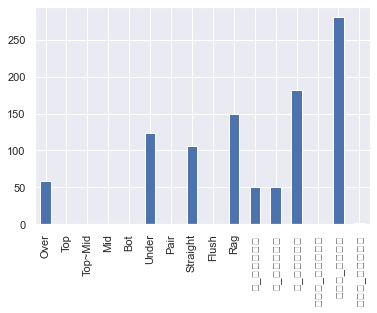

In [90]:
df_9sum.sum().plot.bar()

In [91]:
df_9mean=df_9.drop(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag',  'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード', 'cluster'],axis=1)

<AxesSubplot:>

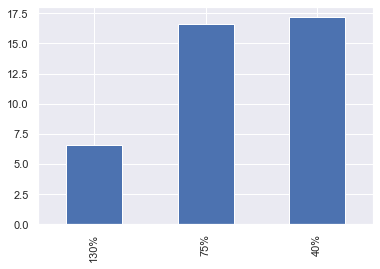

In [92]:
df_9mean.mean().plot.bar()

In [93]:
df_9[["130%","75%","40%","check"]]
df_9.mean()
df_9.sum()

Over            59.000000
Top              0.000000
Top~Mid          0.000000
Mid              0.000000
Bot              0.000000
Under          124.000000
Pair             0.000000
Straight       106.000000
Flush            0.000000
Rag            149.000000
130%          1847.252393
75%           4686.819175
40%           4844.836646
check        16821.066935
色_ツートーン         50.000000
色_モノトーン         50.000000
色_レインボー        182.000000
ボード_トリップス        0.000000
ボード_ペアなし       281.000000
ボード_ペアボード        1.000000
cluster       2538.000000
dtype: float64

In [94]:
df_8[["130%","75%","40%","check"]]

130%        75%        40%      check
Flop_Turn                                            
AHHH        3.892917  12.973750  24.447917  58.683750
AHHH        1.890000   8.283333  34.086667  55.740000
AHHH        3.637778   7.003333  29.325556  60.030000
AHHH        3.446667   7.473333  28.313333  60.773333
AHHH        0.183333   0.590000  50.806667  48.420000
AHHH        0.205000   0.578333  51.136667  48.083333
AHLH        4.503958   4.184167  37.012813  54.299063
AHLH        1.155000   1.405000  43.470000  53.968333
AHLH        2.358611   2.000000  42.784444  52.856944
AHLH        1.008333   1.195833  44.521667  53.276667
AHMH        2.454444  11.612361  31.241806  54.691528
AHMH        2.271111   2.760000  36.603333  58.364444
AHMH        1.735185   5.333704  39.080370  53.852222
AHMH        2.038889   1.975556  37.596667  58.391111
AHUH        4.375000  15.029792  24.458125  56.138958
AHUH        2.003333   6.093333  36.428333  55.475000
AHUH        4.031111   6.358333  33.180556  56.429444
AHUH        2.268333   4.895000  35.816667  57.020000
ALLL        0.642083   1.331042  41.973125  56.055000
ALLL        4.193333   1.693333  32.105000  62.008333
ALLL        0.510000   1.463889  41.272222  56.755556
ALLL        5.056667   1.795000  29.825000  63.320000
ALLL        0.087500   0.347500  48.742500  50.822500
ALLL        0.092500   0.397500  47.380000  52.131250
AMLM        1.796979   1.865104  37.980521  58.356458
AMLM        4.111667   2.020833  29.946667  63.922500
AMLM        1.693889   2.331667  36.966389  59.008889
AMLM        5.911667   1.656667  24.495000  67.935833
AMMM        3.879167   4.072917  31.686667  60.361667
AMMM        3.396667   4.710000  28.436667  63.453333
AMMM        4.076667   4.575556  29.284444  62.064444
AMMM        6.266667   3.530000  21.536667  68.663333
AMMM        0.133333   0.340000  48.936667  50.590000
AMMM        0.093333   0.368333  48.555000  50.983333
AULU        2.058281   2.224844  42.966406  52.748594
AULU        1.082500   1.416250  42.618750  54.878750
AULU        1.167917   1.331667  44.873333  52.627083
AULU        2.036250   1.410000  40.946250  55.611250
AUMU        2.450208  10.435417  33.480833  53.634375
AUMU        1.191667   2.716667  40.203333  55.890000
AUMU        3.178333   5.383333  36.343889  55.094444
AUMU        2.393333   2.651667  35.846667  59.108333
AUUU        2.013750  30.808750  12.851250  54.326250
AUUU        0.940000   2.950000  45.040000  51.070000
AUUU        4.963333  19.270000  17.073333  58.696667
AUUU        1.340000   3.960000  41.350000  53.360000
AUUU        0.170000   0.305000  51.330000  48.195000
AUUU        0.132500   0.465000  51.025000  48.377500
HHHH        0.340000   1.346250  54.901250  43.408750
HHHH        0.640000   3.520000  45.120000  50.720000
HHHH        0.263333   0.890000  54.820000  44.026667
HHHH        0.990000   4.020000  42.870000  52.120000
HHHH        0.170000   0.646667  58.810000  40.373333
HHHH        0.178333   0.810000  62.368333  36.643333
HHLH        0.880417   2.560313  48.069479  48.489479
HHLH        0.425833   0.837500  48.172500  50.565000
HHLH        0.712778   1.506944  49.340833  48.439722
HHLH        0.518333   1.212500  48.005000  50.262500
HHMH        1.266667   9.732500  40.223333  48.777917
HHMH        0.647778   1.891111  45.232222  52.227778
HHMH        1.071111   5.949630  44.960000  48.019630
HHMH        0.721111   3.173333  42.190000  53.914444
HHUH        0.424167   2.101875  53.863958  43.610625
HHUH        0.600000   1.838333  47.763333  49.798333
HHUH        0.353333   1.416667  54.110000  44.120000
HHUH        1.458333   3.068333  43.818333  51.655000
HLLL        0.780556   7.773819  33.749931  57.695903
HLLL        1.873889   4.618889  34.800556  58.707222
HLLL        0.715926   7.545741  35.011296  56.727593
HLLL        1.537222   8.201667  27.222222  63.040000
HLLL        0.253333   0.847500  48.277500  50.621667
HLLL        0.220000   0.740000  47.612917  51.427083
HMLM        0.717535

In [95]:
df_8.mean()

Over          0.000000
Top           0.000000
Top~Mid       0.000000
Mid           1.000000
Bot           0.194444
Under         0.000000
Pair          1.000000
Straight      0.000000
Flush         0.201389
Rag           0.000000
130%          1.399429
75%           5.477646
40%          40.965584
check        52.157583
色_ツートーン       0.500000
色_モノトーン       0.201389
色_レインボー       0.298611
ボード_トリップス     0.000000
ボード_ペアなし      0.805556
ボード_ペアボード     0.194444
cluster       8.000000
dtype: float64

In [96]:
df_8.sum()

Over            0.000000
Top             0.000000
Top~Mid         0.000000
Mid           144.000000
Bot            28.000000
Under           0.000000
Pair          144.000000
Straight        0.000000
Flush          29.000000
Rag             0.000000
130%          201.517755
75%           788.780978
40%          5899.044167
check        7510.692008
色_ツートーン        72.000000
色_モノトーン        29.000000
色_レインボー        43.000000
ボード_トリップス       0.000000
ボード_ペアなし      116.000000
ボード_ペアボード      28.000000
cluster      1152.000000
dtype: float64

In [97]:
df_8sum=df_8.drop(["130%","75%","40%","check","cluster"],axis=1)

<AxesSubplot:>

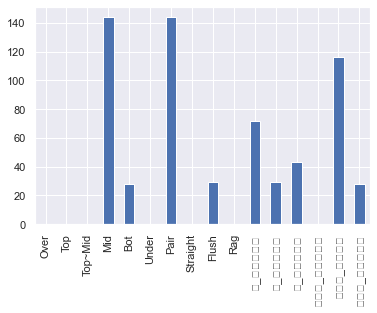

In [98]:
df_8sum.sum().plot.bar()

In [99]:
df_8mean=df_8.drop(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag',  'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード', 'cluster'],axis=1)

<AxesSubplot:>

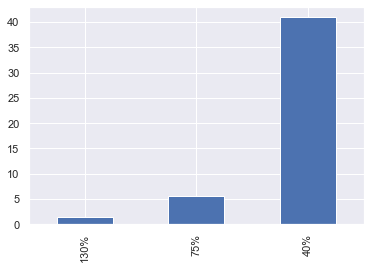

In [100]:
df_8mean.mean().plot.bar()

In [101]:
pd.get_option("display.max_columns")

#最大表示列数の指定（ここでは50列を指定）
pd.set_option('display.max_columns', 50)

df_8

Over  Top  Top~Mid  Mid  Bot  Under  Pair  Straight  Flush  Rag  \
Flop_Turn                                                                    
AHHH          0    0        0    1    0      0     1         0      0    0   
AHHH          0    0        0    1    0      0     1         0      0    0   
AHHH          0    0        0    1    0      0     1         0      0    0   
AHHH          0    0        0    1    0      0     1         0      1    0   
AHHH          0    0        0    1    1      0     1         0      0    0   
AHHH          0    0        0    1    1      0     1         0      0    0   
AHLH          0    0        0    1    0      0     1         0      0    0   
AHLH          0    0        0    1    0      0     1         0      0    0   
AHLH          0    0        0    1    0      0     1         0      0    0   
AHLH          0    0        0    1    0      0     1         0      1    0   
AHMH          0    0        0    1    0      0     1         0      0    0   
AHMH          0    0        0    1    0      0     1         0      0    0   
AHMH          0    0        0    1    0      0     1         0      0    0   
AHMH          0    0        0    1    0      0     1         0      1    0   
AHUH          0    0        0    1    0      0     1         0      0    0   
AHUH          0    0        0    1    0      0     1         0      0    0   
AHUH          0    0        0    1    0      0     1         0      0    0   
AHUH          0    0        0    1    0      0     1         0      1    0   
ALLL          0    0        0    1    0      0     1         0      0    0   
ALLL          0    0        0    1    0      0     1         0      0    0   
ALLL          0    0        0    1    0      0     1         0      0    0   
ALLL          0    0        0    1    0      0     1         0      1    0   
ALLL          0    0        0    1    1      0     1         0      0    0   
ALLL          0    0        0    1    1      0     1         0      0    0   
AMLM          0    0        0    1    0      0     1         0      0    0   
AMLM          0    0        0    1    0      0     1         0      0    0   
AMLM          0    0        0    1    0      0     1         0      0    0   
AMLM          0    0        0    1    0      0     1         0      1    0   
AMMM          0    0        0    1    0      0     1         0      0    0   
AMMM          0    0        0    1    0      0     1         0      0    0   
AMMM          0    0        0    1    0      0     1         0      0    0   
AMMM          0    0        0    1    0      0     1         0      1    0   
AMMM          0    0        0    1    1      0     1         0      0    0   
AMMM          0    0        0    1    1      0     1         0      0    0   
AULU          0    0        0    1    0      0     1         0      0    0   
AULU          0    0        0    1    0      0     1         0      0    0   
AULU          0    0        0    1    0      0     1         0      0    0   
AULU          0    0        0    1    0      0     1         0      1    0   
AUMU          0    0        0    1    0      0     1         0      0    0   
AUMU          0    0        0    1    0      0     1         0      0    0   
AUMU          0    0        0    1    0      0     1         0      0    0   
AUMU          0    0        0    1    0      0     1         0      1    0   
AUUU          0    0        0    1    0      0     1         0      0    0   
AUUU          0    0        0    1    0      0     1         0      0    0   
AUUU          0    0        0    1    0      0     1         0      0    0   
AUUU          0    0        0    1    0      0     1         0      1    0   
AUUU          0    0        0    1    1      0     1         0      0    0   
AUUU          0    0        0    1    1      0     1         0      0    0   
HHHH          0    0        0    1    0      0     1         0      0    0   
HHHH          0    0        0    

In [102]:
df2

Over  Top  Top~Mid  Mid  Bot  Under  Pair  Straight  Flush  Rag  \
Flop_Turn                                                                    
AAAA          0    1        0    0    1      0     1         0      0    0   
AAAH          0    0        1    0    0      1     0         1      0    0   
AAAL          0    0        1    0    0      1     0         0      0    0   
AAAM          0    0        1    0    0      1     0         0      0    0   
AAAU          0    0        1    0    0      1     0         0      0    0   
AAAU          0    0        1    0    0      1     0         1      0    0   
AAHA          0    1        0    0    0      0     1         0      0    0   
AAHA          0    1        0    0    0      0     1         0      0    0   
AAHH          0    0        1    0    0      0     0         1      0    0   
AAHH          0    0        1    0    0      0     0         1      0    0   
AAHH          0    0        1    0    0      0     0         1      1    0   
AAHH          0    0        1    0    0      1     0         1      0    0   
AAHH          0    0        1    0    0      1     0         1      0    0   
AAHH          0    0        1    0    0      1     0         1      1    0   
AAHH          0    0        1    0    1      0     1         0      0    0   
AAHH          0    0        1    0    1      0     1         0      0    0   
AAHL          0    0        1    0    0      1     0         0      0    0   
AAHL          0    0        1    0    0      1     0         0      0    0   
AAHL          0    0        1    0    0      1     0         0      1    0   
AAHM          0    0        1    0    0      1     0         0      0    0   
AAHM          0    0        1    0    0      1     0         0      0    0   
AAHM          0    0        1    0    0      1     0         0      1    0   
AAHU          0    0        1    0    0      1     0         0      0    0   
AAHU          0    0        1    0    0      1     0         0      0    0   
AAHU          0    0        1    0    0      1     0         0      1    0   
AAHU          0    0        1    0    0      1     0         1      0    0   
AAHU          0    0        1    0    0      1     0         1      0    0   
AAHU          0    0        1    0    0      1     0         1      1    0   
AALA          0    1        0    0    0      0     1         0      0    0   
AALA          0    1        0    0    0      0     1         0      0    0   
AALH          0    0        1    0    0      0     0         0      0    0   
AALH          0    0        1    0    0      0     0         0      0    0   
AALH          0    0        1    0    0      0     0         0      1    0   
AALL          0    0        1    0    0      0     0         1      0    0   
AALL          0    0        1    0    0      0     0         1      0    0   
AALL          0    0        1    0    0      0     0         1      1    0   
AALL          0    0        1    0    0      1     0         1      0    0   
AALL          0    0        1    0    0      1     0         1      0    0   
AALL          0    0        1    0    0      1     0         1      1    0   
AALL          0    0        1    0    1      0     1         0      0    0   
AALL          0    0        1    0    1      0     1         0      0    0   
AALM          0    0        1    0    0      0     0         0      0    0   
AALM          0    0        1    0    0      0     0         0      0    0   
AALM          0    0        1    0    0      0     0         0      1    0   
AALU          0    0        1    0    0      0     0         0      0    0   
AALU          0    0        1    0    0      0     0         0      0    0   
AALU          0    0        1    0    0      0     0         0      1    0   
AAMA          0    1        0    0    0      0     1         0      0    0   
AAMA          0    1        0    0    0      0     1         0      0    0   
AAMH          0    0        1    

In [103]:
display(df_7[["130%","75%","40%","check"]])

130%        75%        40%      check
Flop_Turn                                           
AAAA       0.010000   0.770000  44.670000  54.540000
AAAH       0.249167   1.099167  47.394167  51.263333
AAAL       0.323125   3.302500  48.881875  47.489375
AAAM       0.397500   2.151667  49.676667  47.775000
AAAU       0.322500   2.137500  49.567500  47.975000
AAAU       0.260000   1.232500  50.245000  48.255000
HHHA       0.266667   0.290833  53.957500  45.488333
HHHH       0.421667   3.078333  48.528333  47.970000
HHHH       0.073333   0.860000  57.336667  41.726667
HHHH       0.708333   1.789167  46.441667  51.058333
HHHL       1.117292   4.650417  51.482292  42.751250
HHHM       0.788611   4.778889  50.425278  44.008333
HHHU       0.576667   3.340833  50.863750  45.216250
LLLA       0.081250   0.288750  46.283750  53.345625
LLLH       0.264167   0.790417  49.860000  49.083542
LLLL       1.124583  10.739167  46.180833  41.951667
LLLL       0.090000   1.005000  52.010000  46.890000
LLLL       1.662917  15.927500  38.978750  43.432917
LLLM       0.884792   8.035417  48.631250  42.446042
LLLU       0.445937   1.478750  52.537500  45.539375
MMMA       0.085000   0.301667  48.235000  51.373333
MMMH       0.323611   1.238333  44.395556  54.041667
MMML       1.125208   9.448542  46.518750  42.907292
MMMM       0.562500  11.600000  43.662500  44.171667
MMMM       0.050000   1.933333  45.430000  52.590000
MMMM       0.555833   4.035000  47.881667  47.526667
MMMU       0.300417   2.490417  46.532500  50.677083
UUUA       0.477500   0.505000  48.880000  50.130000
UUUH       0.409167   3.806250  44.444583  51.343333
UUUL       1.260625   6.647188  49.813125  42.278125
UUUM       0.992917   8.866250  44.654167  45.488333
UUUU       0.407500   4.007500  50.070000  45.515000
UUUU       0.050000   2.320000  46.290000  51.340000
UUUU       0.172500   4.212500  49.655000  45.957500

In [104]:
df_7.mean()

Over          0.411765
Top           0.147059
Top~Mid       0.147059
Mid           0.117647
Bot           0.147059
Under         0.441176
Pair          0.147059
Straight      0.058824
Flush         0.000000
Rag           0.294118
130%          0.495332
75%           3.798788
40%          48.247518
check        47.457237
色_ツートーン       0.000000
色_モノトーン       0.000000
色_レインボー       1.000000
ボード_トリップス     1.000000
ボード_ペアなし      0.000000
ボード_ペアボード     0.000000
cluster       7.000000
dtype: float64

In [105]:
df_7.sum()

Over           14.000000
Top             5.000000
Top~Mid         5.000000
Mid             4.000000
Bot             5.000000
Under          15.000000
Pair            5.000000
Straight        2.000000
Flush           0.000000
Rag            10.000000
130%           16.841285
75%           129.158785
40%          1640.415625
check        1613.546042
色_ツートーン         0.000000
色_モノトーン         0.000000
色_レインボー        34.000000
ボード_トリップス      34.000000
ボード_ペアなし        0.000000
ボード_ペアボード       0.000000
cluster       238.000000
dtype: float64

In [106]:
df_8sum=df_8.drop(["130%","75%","40%","check","cluster"],axis=1)

df_8mean=df_8.drop(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag',  'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード', 'cluster'],axis=1)

<AxesSubplot:>

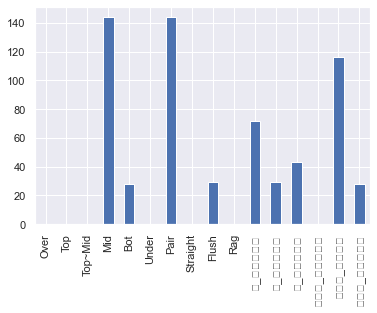

In [107]:
df_8sum.sum().plot.bar()

<AxesSubplot:>

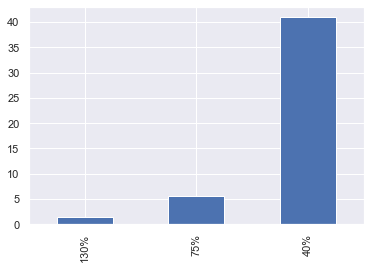

In [108]:
df_8mean.mean().plot.bar()

In [109]:
display(df_6[["130%","75%","40%","check"]])

130%        75%        40%      check
Flop_Turn                                           
AAHA       0.256667   0.743333  64.766667  34.230000
AAHA       0.340000   1.386667  53.191667  45.081667
AALA       0.397500   1.015000  79.427500  19.162500
AALA       0.308750   1.076250  65.180000  33.433750
AAMA       0.380000   1.666667  83.390000  14.563333
AAMA       0.258333   1.010000  69.360000  29.371667
AAUA       0.205000   0.835000  75.300000  23.660000
AAUA       0.185000   0.692500  70.540000  28.585000
AHHA       4.245417  15.000000  22.425000  58.330417
AHHA       0.320000   1.100000  51.697778  46.887778
AHHA       1.476667   7.436667  36.650000  54.440000
AHHA       5.525556  10.268889  22.912222  61.295556
AHHA       0.345556   1.428889  50.094444  48.128889
AHHA       3.293333   6.710000  29.683333  60.316667
AHLA       1.312917   3.453333  45.812500  49.421667
AHLA       0.855000   1.242500  44.850000  53.052500
AHLA       1.038889   1.848333  47.398611  49.715000
AHLA       0.683333   1.973333  44.151667  53.192500
AHMA       0.867917   8.031944  40.996528  50.103333
AHMA       1.657778   2.154444  39.328889  56.856667
AHMA       0.953333   5.383704  43.155185  50.505926
AHMA       1.012222   2.876667  39.305556  56.805556
AHUA       1.532917  11.225000  37.646458  49.597500
AHUA       1.120000   3.913333  41.591667  53.378333
AHUA       2.210556   8.802222  37.019444  51.965556
AHUA       0.986667   3.493333  40.676667  54.845000
ALLA       0.435208   4.993125  44.753750  49.815417
ALLA       0.208333   0.925833  50.376667  48.489167
ALLA       0.300000   0.975000  46.155000  52.571667
ALLA       0.444444   4.292778  46.034444  49.225556
ALLA       0.210000   0.765000  50.182500  48.839167
ALLA       0.310000   0.800000  46.711667  52.178333
AMLA       0.525000   6.171354  41.440313  51.864896
AMLA       0.369167   1.444167  44.473333  53.711667
AMLA       0.493333   4.183889  42.975000  52.348333
AMLA       0.325000   2.601667  40.481667  56.592500
AMMA       0.620833   9.905000  39.411667  50.064583
AMMA       0.195556   0.812222  46.921111  52.071111
AMMA       0.450000   2.803333  42.400000  54.343333
AMMA       0.561111   6.567778  42.250000  50.623333
AMMA       0.166667   0.781111  45.337778  53.714444
AMMA       0.433333   5.306667  35.453333  58.806667
AULA       0.551094   1.692812  51.491719  46.263750
AULA       0.300000   0.875000  47.207500  51.617500
AULA       0.500417   1.332083  51.258750  46.907500
AULA       0.270000   1.060000  47.003750  51.663750
AUMA       0.588750   6.605625  47.431458  45.373542
AUMA       0.391667   1.716667  45.375000  52.515000
AUMA       0.511667   4.958889  48.263889  46.267222
AUMA       0.243333   1.790000  44.516667  53.453333
AUUA       0.816250  23.861250  27.571250  47.751250
AUUA       0.130000   1.148333  52.571667  46.151667
AUUA       0.380000   1.300000  48.630000  49.690000
AUUA       0.783333  19.316667  30.540000  49.360000
AUUA       0.153333   0.723333  53.546667  45.580000
AUUA       0.250000   1.600000  47.830000  50.320000
HHHH       0.363750   3.495000  51.748750  44.392500
HHHH       1.145556   7.413333  38.624444  52.816667
HHHH       1.000000   4.700000  44.080000  50.220000
HHHH       0.353333   2.323333  52.820000  44.496667
HHHH       1.530000   6.820000  40.795556  50.856667
HHHH       1.070000   7.210000  39.950000  51.770000
HHHH       0.163333   0.693333  66.060000  33.083333
HHHH       0.283333   1.046667  70.290000  28.380000
HHLH       0.917812   1.877188  51.635000  45.569792
HHLH       0.507500   2.561667  47.875833  49.051667
HHLH       0.744167   2.059167  51.156389  46.040833
HHLH       0.713333   2.513333  47.555833  49.218333
HHLH       0.531667   4.102500  55.094167  40.270000
HHLH       1.136667   5.864583  51.259583  41.740000
HHMH       2.177222   5.329167  44.566250  47.926111
HHMH       0.827778   4.923333  42.173333  52.072222
HHMH       2.097037   3.234444  47.208519  47.458148
HHMH       1.097778   6.810000  37.74000

In [110]:
df_6.mean()

Over          0.000000
Top           1.000000
Top~Mid       0.000000
Mid           0.116279
Bot           0.000000
Under         0.000000
Pair          1.000000
Straight      0.000000
Flush         0.168605
Rag           0.000000
130%          1.058315
75%           6.995596
40%          43.371589
check        48.574574
色_ツートーン       0.500000
色_モノトーン       0.168605
色_レインボー       0.331395
ボード_トリップス     0.000000
ボード_ペアなし      0.674419
ボード_ペアボード     0.325581
cluster       6.000000
dtype: float64

In [111]:
df_6.sum()

Over            0.000000
Top           172.000000
Top~Mid         0.000000
Mid            20.000000
Bot             0.000000
Under           0.000000
Pair          172.000000
Straight        0.000000
Flush          29.000000
Rag             0.000000
130%          182.030243
75%          1203.242506
40%          7459.913356
check        8354.826644
色_ツートーン        86.000000
色_モノトーン        29.000000
色_レインボー        57.000000
ボード_トリップス       0.000000
ボード_ペアなし      116.000000
ボード_ペアボード      56.000000
cluster      1032.000000
dtype: float64

In [112]:
display(df_5[["130%","75%","40%","check"]])

130%        75%        40%      check
Flop_Turn                                            
AAHH        0.796667  20.514444  23.340000  55.348889
AAHH        1.211111  21.572222  19.298889  57.917778
AALL        0.435000   8.592500  42.343333  48.628333
AALL        0.349167   4.750000  48.017500  46.885000
AAMM        0.611111   9.738889  38.881111  50.773333
AAMM        0.406667   5.723333  45.688889  48.180000
AAUU        0.566667  10.371667  39.748333  49.310000
AAUU        0.911667  11.406667  37.268333  50.415000
AHHH        9.045417  13.857500  13.068750  64.029583
AHHH        3.916667  14.370000  18.096667  63.620000
AHHH        8.782222  10.667778  16.302222  64.246667
AHHH        4.193333  17.623333  11.986667  66.196667
AHLL        3.586979   0.968958  31.032292  64.411562
AHLL       11.240833   4.504167   7.153333  77.101667
AHLL        3.006389   0.758333  32.604444  63.630278
AHLL       10.964167   3.301667   9.394167  76.338333
AHMM       10.463056   1.193194  15.500694  72.841944
AHMM        9.487778   9.228889   4.837778  76.446667
AHMM       10.464444   1.191481  16.505556  71.839630
AHMM       11.473333   5.562222   4.511111  78.451111
AHUU       10.984167  10.205000  12.276250  66.533958
AHUU        3.923333  13.780000  16.063333  66.233333
AHUU        9.747222   7.563333  17.101111  65.588889
AHUU        4.870000  12.446667  12.280000  70.403333
ALLL        0.865417   0.934583  42.235000  55.965833
ALLL        5.311667   2.000000  29.345000  63.341667
ALLL        0.602222   1.002778  41.956667  56.440000
ALLL        6.280000   1.741667  26.808333  65.173333
AMLL        3.091771   1.728229  34.387083  60.793333
AMLL        7.665833   3.580833  18.766667  69.990000
AMLL        2.401944   1.586667  35.727500  60.284444
AMLL        9.101667   2.804167  14.664167  73.432500
AMMM        8.934167   1.681250  23.123750  66.260000
AMMM        7.160000   8.810000  14.153333  69.876667
AMMM        8.165556   1.866667  23.284444  66.687778
AMMM        9.106667   6.430000  10.570000  73.890000
AULL        5.555938   1.874219  27.908906  64.660156
AULL        9.208750   4.715000  13.202500  72.875000
AULL        4.237083   1.595833  31.037917  63.130000
AULL       10.333750   4.236250  11.905000  73.521250
AUMM       11.296875   3.561875  16.503750  68.637708
AUMM        8.163333   7.620000  13.316667  70.900000
AUMM       11.669444   2.705556  16.328333  69.295000
AUMM        8.358333   7.030000  11.818333  72.793333
AUUU       12.412500  14.130000   8.010000  65.448750
AUUU        3.580000  11.980000  21.560000  62.880000
AUUU       13.920000  10.073333   8.906667  67.103333
AUUU        3.020000  10.440000  22.050000  64.480000
HHHH        0.460000   1.055000  54.020000  44.467500
HHHH        4.676667   2.152222  36.222222  56.948889
HHHH        0.680000  14.780000  27.390000  57.160000
HHHH        0.346667   0.820000  53.246667  45.590000
HHHH        5.587778   1.411111  35.957778  57.040000
HHHH        0.910000  16.230000  23.830000  59.020000
HHLL        4.231875   1.792917  41.223021  52.752604
HHLL        0.336389   1.373056  51.571667  46.719722
HHLL        5.874167   9.089167  19.133333  65.900833
HHLL        4.789722   2.240556  38.265833  54.703611
HHLL        0.651389   1.931389  49.422778  47.993333
HHLL        7.739167   6.926667  22.105833  63.228333
HHMM        5.120833   1.906667  40.023889  52.948472
HHMM        0.685556   2.767778  47.502593  49.042963
HHMM        3.912222  15.015556  14.110000  66.963333
HHMM        4.324444   1.523333  41.973704  52.179630
HHMM        1.409630   2.417037  45.370370  50.806296
HHMM        5.137778  11.716667  16.766667  66.380000
HHUU        0.538542   1.265833  56.243542  41.952708
HHUU        0.656667   4.786111  44.198889  50.356667
HHUU        1.036667   9.160000  33.358333  56.445000
HHUU        0.430000   1.041667  58.350556  40.178889
HHUU        1.014444   3.775556  45.509444  49.700000
HHUU        1.350000  11.798333  28.583333  58.271667
HLLL        0.896944

In [113]:
df_5.mean()

Over          0.000000
Top           0.000000
Top~Mid       0.055556
Mid           0.000000
Bot           1.000000
Under         0.000000
Pair          1.000000
Straight      0.000000
Flush         0.201389
Rag           0.000000
130%          3.696454
75%           8.066090
40%          30.053946
check        58.183530
色_ツートーン       0.500000
色_モノトーン       0.201389
色_レインボー       0.298611
ボード_トリップス     0.000000
ボード_ペアなし      0.805556
ボード_ペアボード     0.194444
cluster       5.000000
dtype: float64

In [114]:
df_5.sum()

Over            0.000000
Top             0.000000
Top~Mid         8.000000
Mid             0.000000
Bot           144.000000
Under           0.000000
Pair          144.000000
Straight        0.000000
Flush          29.000000
Rag             0.000000
130%          532.289433
75%          1161.516962
40%          4327.768264
check        8378.428252
色_ツートーン        72.000000
色_モノトーン        29.000000
色_レインボー        43.000000
ボード_トリップス       0.000000
ボード_ペアなし      116.000000
ボード_ペアボード      28.000000
cluster       720.000000
dtype: float64

In [115]:
display(df_4[["130%","75%","40%","check"]])

130%        75%        40%      check
Flop_Turn                                            
AHHH        1.108889  16.894444  20.115556  61.878889
AHHH       11.158889  18.908889  11.988889  57.937778
AHHH        1.057500  20.335000  14.005000  64.602500
AHHH       14.299167   8.887500  17.200000  59.612500
AHHH        1.870000   2.940000  32.373333  62.816667
AHLH       12.084815  17.937685   7.418981  62.557963
AHLH       12.415208  16.906250   8.426250  62.253542
AHLH        3.785278  19.038333  13.526111  63.648611
AHMH       13.294691  17.121975   5.806667  63.776790
AHMH       12.560833  16.980556   6.268889  64.190556
AHMH        3.700741  19.616667  11.472963  65.210370
AHUH        9.143519  14.482222  12.564444  63.810000
AHUH        8.639167  15.058333  11.393750  64.910417
AHUH        2.298333  11.948889  21.568333  64.186667
ALLH       17.603642   3.657407   9.764815  68.974383
ALLH       18.176111   2.568333   8.429167  70.826528
ALLH        6.094259  12.553148  17.957963  63.393889
ALLL        0.590556   5.275833  32.361111  61.772778
ALLL        0.735625   8.272500  28.989375  62.003125
ALLL        2.333333   7.330833  28.734167  61.601667
ALLM        2.046806  16.039583  19.513194  62.400417
ALLM        1.590313  15.402812  20.606562  62.400625
ALLM        2.198750  10.832917  28.001250  58.966667
ALLM        2.147889  13.509556  20.205667  64.137111
ALLM        1.840750  12.955750  21.566000  63.637250
ALLM        3.788333  12.773000  21.176667  62.262000
ALLU        7.962315  11.696204  17.511481  62.830463
ALLU        7.155000  13.333542  15.537292  63.973750
ALLU        3.071944   8.226944  30.915000  57.787222
AMLH       15.623302  12.849259   7.759907  63.767469
AMLH       16.694375   9.626736   7.066389  66.612222
AMLH        8.020833   9.745833  16.846111  65.386852
AMLM        5.875333  21.315556   8.726444  64.082000
AMLM        5.069500  20.416000   9.213000  65.301500
AMLM        4.042000  11.776000  21.388000  62.793333
AMLM        3.373492  25.114603   5.921111  65.590635
AMLM        3.456071  23.592143   6.505357  66.447857
AMLM        5.490000  13.039048  16.977143  64.493333
AMLU        9.081217  23.937619   7.259841  59.720212
AMLU        8.604881  23.154048   6.542857  61.697500
AMLU        4.713651   8.143333  27.363333  59.778889
AMLU        3.011852  23.383333  13.707037  59.895185
AMLU        2.395000  25.365000  10.590833  61.649167
AMLU        4.664444   8.504444  26.513333  60.314444
AMMH       13.090556  21.280972   7.747639  57.880694
AMMH       15.134687  17.993437   7.439687  59.433125
AMMH       10.751389   1.575556  13.532778  74.139722
AMMH        6.585000  11.172083  19.236250  63.008750
AMMH       12.647778  17.370000  13.121111  56.857778
AMMH       11.567500  17.375000  12.507500  58.550000
AMMH        2.870000  12.733333  25.900000  58.496667
AMMM        4.888889  25.138889   9.176667  60.792222
AMMM        3.500000  27.125000   7.747500  61.627500
AMMM        2.803333  13.130000  24.973333  59.093333
AMMU        5.903333  25.821111  12.241852  56.034259
AMMU        4.405000  27.269167  11.267083  57.056667
AMMU        3.287778  10.551111  27.528333  58.632222
AULH       15.880000  16.600648   6.903704  60.614722
AULH       17.779792  13.257708   5.626458  63.337292
AULH        6.413611  12.220278  18.606389  62.758889
AULH        6.235556  24.567222  12.376204  56.821667
AULH        6.336042  22.560208  14.078333  57.024792
AULH        3.588333  13.512500  22.782778  60.117222
AULU       12.876667  25.831944   5.401111  55.890556
AULU       11.691250  25.466875   5.760000  57.083125
AULU        4.045833  10.084167  28.597500  57.275833
AUMH       14.202963  20.296667   6.342963  59.156852
AUMH       15.800417  18.130833   6.365417  59.701250
AUMH        6.131111  11.657222  18.829444  63.381111
AUMH       12.844167  17.791667  10.109630  59.255093
AUMH       11.276458  17.838125  10.226042  60.659375
AUMH        3.009167  17.671944  17.475000  61.841667
AUMU        7.634444

In [116]:
df_4.mean()

Over          0.000000
Top           0.000000
Top~Mid       1.000000
Mid           0.000000
Bot           0.000000
Under         0.000000
Pair          0.000000
Straight      0.655172
Flush         0.300493
Rag           0.000000
130%          6.209946
75%          18.607062
40%          13.502739
check        61.680066
色_ツートーン       0.615764
色_モノトーン       0.068966
色_レインボー       0.315271
ボード_トリップス     0.000000
ボード_ペアなし      0.970443
ボード_ペアボード     0.029557
cluster       4.000000
dtype: float64

In [117]:
df_4.sum()

Over             0.000000
Top              0.000000
Top~Mid        203.000000
Mid              0.000000
Bot              0.000000
Under            0.000000
Pair             0.000000
Straight       133.000000
Flush           61.000000
Rag              0.000000
130%          1260.618976
75%           3777.233643
40%           2741.055991
check        12521.053468
色_ツートーン        125.000000
色_モノトーン         14.000000
色_レインボー         64.000000
ボード_トリップス        0.000000
ボード_ペアなし       197.000000
ボード_ペアボード        6.000000
cluster        812.000000
dtype: float64

In [118]:
display(df_3[["130%","75%","40%","check"]])

130%        75%        40%      check
Flop_Turn                                            
AAHH        9.329167   6.437500  25.079167  59.154167
AAHH        5.232500   6.030000  37.530000  51.212500
AAHL        1.088542   6.218958  41.816042  50.877500
AAHM        0.827778   7.525278  40.822778  50.824722
AAHU        1.786667   8.844167  39.071667  50.296667
AAHU        1.109167   5.177500  49.485000  44.227500
AALH        0.952917   4.561875  43.667708  50.819167
AALL        0.461250   6.504583  44.154167  48.880000
AALL        0.286667   4.971250  45.752500  48.989583
AALM        0.569583   6.620625  42.779167  50.030625
AALU        0.678438   5.847500  44.117500  49.356563
AAMH        1.906667   7.421389  37.683889  52.987500
AAML        0.401042   3.688333  48.347083  47.564375
AAMM        0.715000   7.796667  42.646667  48.837500
AAMM        0.488333   4.203333  49.037500  46.270833
AAMU        0.916667   8.955833  41.758333  48.370000
AAUH        4.128333   6.611667  34.631667  54.627500
AAUH        2.295833   3.142500  45.992500  48.565833
AAUL        0.400313   2.250625  52.306250  45.043438
AAUM        0.450833   1.633750  54.418333  43.497917
AAUU        1.407500  11.205000  39.822500  47.562500
AAUU        0.820000   2.340000  55.290000  41.547500
AHHH       10.532500   8.352500  23.476667  57.639167
AHHL        9.665556   2.511389  26.047778  61.775833
AHHL        7.427500   3.617500  28.527500  60.428958
AHHM        6.212222   7.830000  28.057037  57.900370
AHHM        5.093611   7.733611  28.636667  58.533333
AHHU        6.322222  15.578889  19.322222  58.780000
AHHU        5.369167  12.465000  22.583333  59.585833
AHHU        3.971667   5.856667  40.400833  49.775000
ALLH        5.898125   0.968333  25.421250  67.712917
ALLL        0.384444   0.978333  43.568889  55.068333
ALLL        0.246250   1.556667  41.581250  56.615417
ALLL        0.247083   1.297917  43.143750  55.310000
ALLM        0.893750   1.866875  40.670625  56.570208
ALLU        3.296875   1.045938  37.785000  57.873750
AMML        0.808056   2.008889  42.362222  54.821944
AMML        0.424792   2.039375  41.617292  55.918958
AMMM        1.275556   4.721111  39.448889  54.553333
AMMM        0.943333   4.760833  38.051667  56.243333
AMMM        2.375833   4.783333  33.938333  58.901667
AMMU        7.169583   2.925000  26.771250  63.132500
AUUH        5.011667  12.644167  28.177500  54.165000
AUUL        3.078333   1.842500  41.992917  53.086667
AUUL        2.021562   1.171250  45.214062  51.592188
AUUM        0.958333   6.620556  43.062778  49.358889
AUUM        0.935833   3.787500  45.840000  49.437083
AUUU        0.823333  19.120000  28.953333  51.103333
AUUU        1.792500  11.425000  34.062500  52.717500
AUUU        4.995000  15.572500  18.952500  60.477500
HHHA       11.797500  13.394167  11.524583  63.285833
HHHH        0.860000   8.992500  44.647500  45.500000
HHHH        1.022500  14.530000  37.166250  47.283750
HHHH        0.482500   3.552500  51.190000  44.780000
HHHH        1.071250   2.647500  48.511250  47.770000
HHHL        1.106389   4.111528  48.144444  46.637917
HHHL        0.735000   2.710417  50.461458  46.092917
HHHM        0.729583   5.792500  47.510833  45.966667
HHHM        0.697969   3.840625  49.164531  46.297813
HHHM        0.475000   1.445000  54.587500  43.491250
HHHU        0.223750   1.108750  42.427500  56.238750
HHHU        0.690000   6.127500  49.208125  43.974375
HHLA        3.667708  10.871458  24.934792  60.525208
HHLH        2.579444   8.185833  34.563333  54.672222
HHLH        4.082708   7.710417  29.793750  58.411667
HHLH        2.629167   7.775625  32.298542  57.296875
HHLL        0.867407   5.644630  44.197778  49.289815
HHLL        1.550694   8.021806  38.442639  51.984722
HHLL        0.557593   4.918333  46.314074  48.210556
HHLL        1.012361   5.277222  44.471806  49.238750
HHLM        1.258519   8.955463  39.831019  49.954630
HHLM        2.847153   9.100625  35.362778  52.688542
HHLU        2.693750

In [119]:
df_3.mean()

Over          0.245614
Top           0.000000
Top~Mid       0.241228
Mid           0.000000
Bot           0.000000
Under         0.399123
Pair          0.000000
Straight      0.342105
Flush         0.000000
Rag           0.359649
130%          2.270435
75%           8.740168
40%          36.804109
check        52.185290
色_ツートーン       0.179825
色_モノトーン       0.000000
色_レインボー       0.820175
ボード_トリップス     0.000000
ボード_ペアなし      0.004386
ボード_ペアボード     0.995614
cluster       3.000000
dtype: float64

In [120]:
df_3.sum()

Over            56.000000
Top              0.000000
Top~Mid         55.000000
Mid              0.000000
Bot              0.000000
Under           91.000000
Pair             0.000000
Straight        78.000000
Flush            0.000000
Rag             82.000000
130%           517.659109
75%           1992.758401
40%           8391.336834
check        11898.246028
色_ツートーン         41.000000
色_モノトーン          0.000000
色_レインボー        187.000000
ボード_トリップス        0.000000
ボード_ペアなし         1.000000
ボード_ペアボード      227.000000
cluster        684.000000
dtype: float64

In [121]:
display(df_2[["130%","75%","40%","check"]])

130%        75%        40%      check
Flop_Turn                                            
AHHH        1.747778  22.716667  10.810000  64.724444
AHHH        1.393333   5.030000  29.690000  63.890000
AHHH        2.545556  24.522222   5.333333  67.596667
AHHH        1.440000   9.016667  21.920000  67.626667
AHHL        4.837778  15.171667  14.941389  65.049444
AHHM        4.037500  16.044583  15.050000  64.865833
AHHM       13.426667   3.900000  21.505556  61.165556
AHHM        2.340000  10.130000  26.196667  61.330000
AHHU        7.640370  13.333148  16.545000  62.482593
AHHU        2.348889   9.670000  24.343333  63.636111
AHLH        6.709722  22.931667  10.315000  60.043426
AHLH        3.083056  20.296389  14.303611  62.316389
AHLL        5.909630   7.627593  22.596667  63.866111
AHLL        6.207037   7.577222  21.599630  64.615000
AHLM        5.291204   9.976759  20.255741  64.476389
AHLU        3.851111  13.062222  20.253889  62.832778
AHLU        3.680556  26.423519  14.726204  55.168796
AHLU        2.401944  13.314444  26.004444  58.278889
AHMH        7.545309  23.741728   7.712716  61.000247
AHMH        3.047407  20.622963  13.141111  63.189630
AHML        5.986667   9.013611  19.884352  65.115556
AHMM        4.390833  13.546667  18.132500  63.930833
AHMM       10.046667  10.131111  26.940000  52.880000
AHMM        2.146667   8.050000  33.380000  56.423333
AHMM        5.005000  12.238333  19.630417  63.127917
AHMM        9.482222   9.283333  29.921111  51.314444
AHMM        1.763333   7.853333  34.916667  55.470000
AHMU        3.574444  15.246111  17.350000  63.828333
AHMU        9.937315  20.128148  13.290000  56.644074
AHMU        2.081111  14.367500  24.793611  58.758333
AHUH        6.632778  15.391111  16.725741  61.251296
AHUH        1.827222  11.647222  24.555556  61.971667
AHUL        4.392917  10.997083  21.456389  63.153611
AHUM        3.457500  13.197778  20.768611  62.575000
AHUM       12.059259   9.541481  21.642037  56.756667
AHUM        1.921667  10.748889  28.876667  58.452778
AHUU       14.634444  12.098519  12.945185  60.320741
AHUU        2.564444  16.778889  20.324444  60.331111
AHUU       12.957407   9.296296  16.519259  61.227778
AHUU        3.025556  15.567778  18.682222  62.724444
ALLL        0.717222   7.403889  29.485833  62.389444
ALLL        2.462500   8.344167  25.961667  63.229167
ALLL        0.737500   7.275278  29.514167  62.470833
ALLL        2.699167   8.546667  25.218333  63.536667
AMLL        3.640000  17.027500  13.645000  65.688750
AMLL        2.994000  13.480667  17.180667  66.343889
AMLL        4.633333  16.133000  13.146333  66.088667
AMLL        3.749167  17.660000  12.540000  66.051250
AMLL        3.187667  11.832444  19.018222  65.962333
AMLL        5.013333  15.583000  12.924333  66.479667
AMLM        5.089333  13.044667  16.866000  65.002667
AMLM        3.883175  24.031587   6.124603  65.959683
AMLM        5.545238  13.435714  16.353810  64.664286
AMML        4.128000  17.746667  11.377333  66.749333
AMML        2.986349  24.251429   7.129683  65.632381
AMML        4.678571  14.445714  17.069524  63.804762
AMMM        4.131111  26.384444   7.944444  61.541111
AMMM        3.460000  12.903333  22.550000  61.090000
AMMM        3.662222  21.587778  16.515556  58.233333
AMMM        3.053333  11.040000  26.866667  59.036667
AULL        3.809167   6.440556  31.545556  58.204722
AULL        4.169722   7.755556  28.319444  59.756389
AULM        3.109524   7.011905  34.006984  55.870476
AULM        3.233704  22.335556  14.793333  59.637407
AULM        3.648889  11.078889  24.521111  60.750000
AULU        1.905000   6.315000  38.895000  52.883333
AUML        3.658413   8.826508  28.201270  59.314603
AUML        2.938519  18.942593  20.674815  57.441852
AUML        3.416667   9.824444  27.236667  59.521111
AUMM        5.239074  20.116667  21.592778  53.052407
AUMM        2.825556   7.719444  32.357222  57.098333
AUMM        4.230741  17.190556  27.925370  50.651667
AUMM        2.597778

In [122]:
df_2.mean()

Over          0.368750
Top           0.000000
Top~Mid       0.000000
Mid           0.000000
Bot           0.000000
Under         0.312500
Pair          0.000000
Straight      0.687500
Flush         0.578125
Rag           0.000000
130%          4.535307
75%          17.064716
40%          17.005049
check        61.394979
色_ツートーン       1.000000
色_モノトーン       0.000000
色_レインボー       0.000000
ボード_トリップス     0.000000
ボード_ペアなし      1.000000
ボード_ペアボード     0.000000
cluster       2.000000
dtype: float64

In [123]:
df_2.sum()

Over           118.000000
Top              0.000000
Top~Mid          0.000000
Mid              0.000000
Bot              0.000000
Under          100.000000
Pair             0.000000
Straight       220.000000
Flush          185.000000
Rag              0.000000
130%          1451.298163
75%           5460.709075
40%           5441.615634
check        19646.393166
色_ツートーン        320.000000
色_モノトーン          0.000000
色_レインボー          0.000000
ボード_トリップス        0.000000
ボード_ペアなし       320.000000
ボード_ペアボード        0.000000
cluster        640.000000
dtype: float64

In [124]:
display(df_1[["130%","75%","40%","check"]])

130%        75%        40%      check
Flop_Turn                                            
AAHH        8.891111   6.377778  29.704444  55.021111
AAHH        6.720000  10.373333  23.260000  59.640000
AAHH        5.436667   8.872222  36.097778  49.597778
AAHH        5.066667   8.303333  34.723333  51.906667
AAHL        1.852500   8.609167  39.571389  49.967500
AAHL        1.440833   2.350833  44.072500  52.135833
AAHM        0.999630  10.692593  39.241852  49.068519
AAHM        2.121111   3.144444  40.303333  54.428889
AAHU        1.828889  13.285556  36.624444  48.261111
AAHU        1.496667   4.473333  41.686667  52.333333
AAHU        1.397778   5.577778  48.120000  44.905556
AAHU        1.336667   5.040000  44.283333  49.346667
AALH        0.777222   4.038611  46.666944  48.517500
AALH        1.171667   1.755000  44.999167  52.072500
AALL        0.523333   5.325556  45.052778  49.099444
AALL        0.285000   2.803333  42.765000  54.145000
AALL        0.292222   4.821667  45.825000  49.061667
AALL        0.241667   1.995000  44.113333  53.650000
AALM        0.608889   4.773611  45.719167  48.896667
AALM        0.469167   4.991667  37.704167  56.830833
AALU        0.697500   2.985000  49.480833  46.836667
AALU        0.388750   2.947500  43.483750  53.180000
AAMH        0.907407   8.685926  40.295556  50.110000
AAMH        1.713333   3.562222  38.628889  56.096667
AAML        0.468611   5.528333  45.295278  48.707778
AAML        0.358333   1.983333  43.263333  54.398333
AAMM        0.771111   5.721111  45.991111  47.517778
AAMM        0.470000   5.366667  36.290000  57.876667
AAMM        0.473333   3.077778  50.764444  45.682222
AAMM        0.383333   2.103333  43.030000  54.486667
AAMU        0.813333   7.986667  44.496667  46.701111
AAMU        0.496667   2.895000  41.646667  54.966667
AAUH        2.346667   9.933333  36.994444  50.725556
AAUH        1.896667   4.843333  38.406667  54.846667
AAUH        2.287778   3.638889  46.204444  47.871111
AAUH        2.236667   5.996667  37.730000  54.030000
AAUL        0.573750   2.989167  51.475833  44.961667
AAUL        0.270000   0.985000  48.707500  50.040000
AAUM        0.537222   2.327778  54.635556  42.496111
AAUM        0.278333   0.933333  48.738333  50.048333
AAUU        1.010000  13.796667  38.950000  46.243333
AAUU        0.530000   1.980000  45.490000  52.000000
AAUU        0.860000   6.066667  51.946667  41.126667
AAUU        0.470000   0.610000  50.520000  48.400000
AHHH       17.788889  10.031111  12.043333  60.133333
AHHH       11.170000   7.320000  22.780000  58.733333
AHHH       12.496667   9.200000  19.036667  59.266667
AHHL        4.940833   2.140000  34.479167  58.440000
AHHM        5.822222   3.386667  29.676667  61.114444
AHHU        6.890000   4.886667  28.200000  60.023333
AHHU        9.470000   7.786667  30.770000  51.972222
AHHU        5.226667   6.363333  34.193333  54.223333
ALLH        7.220556   1.563611  24.632222  66.586667
ALLH       10.721667   6.210000   7.727500  75.340833
ALLL        3.641667   1.420000  33.971667  60.968333
ALLL        0.310556   0.817222  44.738889  54.133889
ALLL        4.236667   1.490000  33.260000  61.015000
ALLM        1.408333   1.652778  41.628889  55.309167
ALLM        6.723333   2.174167  23.580000  67.524167
ALLU        4.882083   1.515417  36.145417  57.455833
ALLU        8.645000   2.825000  17.962500  70.568750
AMMH       12.231852   2.290741  12.672222  72.805926
AMMH        9.971111   8.103333   6.691111  75.234444
AMML        4.639167   1.565833  27.967500  65.823333
AMMM        4.363333   2.763333  26.463333  66.403333
AMMM        3.372222   2.746667  37.048889  56.836667
AMMM        7.553333   3.070000  20.070000  69.306667
AMMU        8.300000   4.545000  24.946667  62.206667
AMMU        9.423333   3.806667  15.843333  70.926667
AUUH        8.510000   8.543333  14.826667  68.120000
AUUH        2.401111  18.700000  26.002222  52.898889
AUUH        5.066667   9.493333  30.253333  55.196667
AUUL        3.300000

In [125]:
df_1.mean()

Over          0.339286
Top           0.000000
Top~Mid       0.336310
Mid           0.000000
Bot           0.000000
Under         0.276786
Pair          0.000000
Straight      0.458333
Flush         0.565476
Rag           0.000000
130%          2.792673
75%           8.983524
40%          32.266147
check        55.957493
色_ツートーン       1.000000
色_モノトーン       0.000000
色_レインボー       0.000000
ボード_トリップス     0.000000
ボード_ペアなし      0.000000
ボード_ペアボード     1.000000
cluster       1.000000
dtype: float64

In [126]:
df_1.sum()

Over           114.000000
Top              0.000000
Top~Mid        113.000000
Mid              0.000000
Bot              0.000000
Under           93.000000
Pair             0.000000
Straight       154.000000
Flush          190.000000
Rag              0.000000
130%           938.338172
75%           3018.464216
40%          10841.425317
check        18801.717644
色_ツートーン        336.000000
色_モノトーン          0.000000
色_レインボー          0.000000
ボード_トリップス        0.000000
ボード_ペアなし         0.000000
ボード_ペアボード      336.000000
cluster        336.000000
dtype: float64

In [127]:
display(df_0[["130%","75%","40%","check"]])

130%        75%        40%      check
Flop_Turn                                           
AHHH       0.240000   0.980000  42.140000  56.640000
AHHH       3.270000   0.500000  34.760000  61.470000
AHHH       0.180000   1.340000  41.240000  57.230000
AHHH       2.350000   0.670000  36.650000  60.330000
AHHH       0.180000   0.710000  43.300000  55.810000
AHHH       3.950000   0.590000  33.150000  62.300000
AHHL       1.315000   2.560833  29.271667  66.853333
AHHM       0.475000   2.757500  35.763750  61.003750
AHHM       0.850000  12.780000  26.920000  59.450000
AHHM       0.520000   2.950000  36.320000  60.200000
AHHU       0.495000   6.833333  34.515000  58.158333
AHHU       0.350000   1.335000  40.270000  58.043333
AHLH       2.002500  14.825000  24.068333  59.104167
AHLH       2.283333   3.405833  25.747500  68.564167
AHLH       2.647500  14.397500  21.808333  61.145833
AHLH       3.205000   2.323333  26.075833  68.397500
AHLL       3.305000   2.355000  21.327778  73.013333
AHLL       3.603333   1.926111  21.847222  72.623333
AHLM       2.901667   1.946667  24.291389  70.859444
AHLU       2.747500   1.951667  25.565833  69.733333
AHLU       1.251667  11.450000  31.080000  56.217500
AHLU       1.921667   2.065833  28.880000  67.132500
AHMH       1.678889  15.338889  22.678889  60.304444
AHMH       1.234444   1.862222  35.070000  61.833333
AHMH       1.854444  16.400000  19.888889  61.856667
AHMH       1.447778   1.968889  34.487778  62.094444
AHML       3.211389   1.427500  25.636667  69.725278
AHMM       1.515000   1.471250  32.028750  64.987500
AHMM       0.920000   9.860000  32.700000  56.520000
AHMM       0.800000   0.970000  36.560000  61.660000
AHMM       1.533750   1.263750  32.620000  64.582500
AHMM       0.890000  10.950000  31.160000  57.000000
AHMM       1.010000   1.170000  36.300000  61.510000
AHMU       0.770000   1.923333  34.813333  62.493333
AHMU       0.930833  12.906667  28.946667  57.211667
AHMU       0.469167   1.634167  37.858333  60.036667
AHUH       0.590000   7.381667  34.213333  57.813333
AHUH       0.790000   1.133333  39.666667  58.411667
AHUH       0.541667   7.576667  33.728333  58.151667
AHUH       0.870000   1.008333  39.961667  58.158333
AHUL       2.367083   1.781667  27.457500  68.393333
AHUM       0.690000   1.890000  35.642500  61.779167
AHUM       0.783333  11.258333  31.018333  56.943333
AHUM       0.391667   1.596667  38.255000  59.755000
AHUU       0.770000  13.736667  28.300000  57.193333
AHUU       0.290000   1.296667  42.130000  56.283333
AHUU       0.666667  15.000000  25.066667  59.266667
AHUU       0.243333   1.880000  41.330000  56.546667
ALLH       2.069444  12.398889  27.232778  58.298889
ALLH       3.373333   1.920556  22.942778  71.765000
ALLL       2.332500   3.890000  31.352500  62.422500
ALLL       2.592500   2.407500  21.377500  73.622500
ALLL       2.167500   4.190000  30.590000  63.052500
ALLL       2.430000   2.412500  21.210000  73.950000
ALLL       2.920000   3.022500  31.852500  62.207500
ALLL       2.560000   1.972500  22.190000  73.277500
ALLM       2.563750   6.572500  32.385000  58.478750
ALLM       2.691250   1.082500  25.722500  70.505000
ALLM       4.474000   6.283000  28.674000  60.569000
ALLM       2.244000   0.820000  26.222000  70.715000
ALLU       1.848333   5.692500  37.386667  55.072500
ALLU       2.773333   1.225833  24.027500  71.972500
AMLH       2.369444  12.651667  25.189444  59.788889
AMLH       3.540556   1.744722  24.855000  69.860000
AMLL       3.311250   0.982500  25.105000  70.601250
AMLL       3.265000   8.575000  27.537000  60.622000
AMLL       2.389000   0.877000  26.362000  70.372000
AMLL       3.272500   0.816250  25.630000  70.280000
AMLL       3.841000   9.919000  23.530000  62.713000
AMLL       2.463000   0.895000  26.174000  70.468000
AMLM       3.126000   0.980000  26.420000  69.478000
AMLM       2.685714  10.180000  27.738571  59.394286
AMLM       1.271429   0.622857  31.800000  66.308571
AMLM       2.308000   8.078000  31.25800

In [128]:
df_0.mean()

Over          0.276102
Top           0.000000
Top~Mid       0.250580
Mid           0.000000
Bot           0.000000
Under         0.232019
Pair          0.000000
Straight      0.691415
Flush         0.570766
Rag           0.002320
130%          1.928065
75%           6.332271
40%          28.874554
check        62.864998
色_ツートーン       0.000000
色_モノトーン       0.993039
色_レインボー       0.006961
ボード_トリップス     0.000000
ボード_ペアなし      1.000000
ボード_ペアボード     0.000000
cluster       0.000000
dtype: float64

In [129]:
df_0.sum()

Over           119.000000
Top              0.000000
Top~Mid        108.000000
Mid              0.000000
Bot              0.000000
Under          100.000000
Pair             0.000000
Straight       298.000000
Flush          246.000000
Rag              1.000000
130%           830.996060
75%           2729.208586
40%          12444.932936
check        27094.814204
色_ツートーン          0.000000
色_モノトーン        428.000000
色_レインボー          3.000000
ボード_トリップス        0.000000
ボード_ペアなし       431.000000
ボード_ペアボード        0.000000
cluster          0.000000
dtype: float64

In [130]:
overbet=df2[df2["130%"]>15]

In [131]:
display(overbet[["130%","75%","40%","check"]])

130%        75%        40%      check
Flop_Turn                                            
AHHH       17.788889  10.031111  12.043333  60.133333
AHLU       15.135463  14.525648   9.015000  61.322500
AHLU       17.187500  10.808750   9.082083  62.920208
AHMM       16.607222  14.528194   7.937639  60.926111
AHMM       16.602500  12.465312  10.483438  60.449375
AHMM       17.816562  11.535313  10.347500  60.302188
AHMU       16.600370  16.672778   6.413333  60.312222
AHMU       17.686250  13.399583   7.757917  61.156667
ALLH       17.603642   3.657407   9.764815  68.974383
ALLH       18.176111   2.568333   8.429167  70.826528
AMLH       15.623302  12.849259   7.759907  63.767469
AMLH       16.694375   9.626736   7.066389  66.612222
AMMH       15.134687  17.993437   7.439687  59.433125
AULH       15.880000  16.600648   6.903704  60.614722
AULH       17.779792  13.257708   5.626458  63.337292
AULU       15.601250  17.834375  12.872500  53.691250
AUMH       15.800417  18.130833   6.365417  59.701250
AUUH       19.201111   8.468148   9.503333  62.827037
AUUH       16.825833   9.196667  10.109167  63.869167
HHLA       18.197593   9.110926   7.141204  65.549444
HHLA       15.622917  10.676458   8.951042  64.749792
HHLL       15.328056   8.382639  16.440972  59.849167
HHLL       15.394306   8.293056  18.496944  57.814861
HHLM       15.451484   8.715703  15.961484  59.871406
HHMA       19.122593   9.650000   4.917160  66.310000
HHMA       17.024167  10.281944   5.777222  66.917500
HHML       16.279722   9.403542  14.191458  60.126111
HHMM       15.101481  14.735370  12.826481  57.336111
HHMM       18.061250  12.337083  10.937917  58.662500
HHMM       15.634643  15.622500   9.602143  59.142500
HLLH       16.590988  14.125000   4.912840  64.371358
HLLH       16.841389  11.613611   5.581389  65.963889
HLLH       21.418333   5.669012   6.852160  66.062284
HLLH       19.145000   3.462917  10.613333  66.778750
HLLU       17.387623  16.965525   3.756142  61.890988
HLLU       19.302222  13.051736   3.922778  63.723542
HMLA       18.978951   9.430370   6.191883  65.399167
HMLA       16.589375  10.206458   6.431319  66.772569
HMLH       17.392882  12.228437   5.257674  65.120729
HMLH       16.252031  11.418828   5.413594  66.915000
HMLH       19.313993   7.995521   6.725417  65.964306
HMLH       16.462187   6.745000   9.680312  67.112656
HMLU       17.774709  16.242407   3.330238  62.652354
HMLU       18.922560  13.062143   3.032738  64.982560
HMMA       21.632593  11.652222   4.526790  62.187037
HMMA       21.473056   9.928333   4.266111  64.332500
HMMH       17.177407  18.082593   3.257778  61.483148
HMMH       17.917917  14.423750   3.292083  64.365833
HMMH       17.545714  15.384603   3.948571  63.120635
HMMH       15.525000  14.625000   4.720357  65.130357
HULA       25.812870   3.448056   3.422963  67.315648
HULA       26.292708   2.568333   2.880625  68.259375
HULM       15.789286  15.298929  11.712738  57.199286
HUMA       22.611111   7.876543   4.274198  65.238519
HUMA       23.170278   5.941111   3.921111  66.968056
HUUA       15.679167  10.903333   7.527500  65.891667
ULLH       19.937284  10.170340   6.891420  63.000679
ULLH       18.589375   6.685278  11.230972  63.494514
ULLU       17.194074  23.046481   2.127037  57.632037
ULLU       19.414167  18.646667   2.093750  59.847917
ULLU       21.442778  14.172037   4.162407  60.222222
ULLU       20.905833  11.068333   6.851667  61.173750
UMLH       15.988727  15.325579   5.779236  62.907060
UULA       25.221667   7.047222   3.702500  64.029167
UULA       25.220000   4.816875   4.011875  65.949375

In [132]:
overbet.mean()

Over          0.400000
Top           0.000000
Top~Mid       0.338462
Mid           0.000000
Bot           0.000000
Under         0.076923
Pair          0.000000
Straight      0.123077
Flush         0.000000
Rag           0.246154
130%         18.121181
75%          11.456739
40%           7.330282
check        63.091775
色_ツートーン       0.430769
色_モノトーン       0.000000
色_レインボー       0.569231
ボード_トリップス     0.000000
ボード_ペアなし      0.984615
ボード_ペアボード     0.015385
cluster       5.784615
dtype: float64

In [133]:
overbet.sum()

Over           26.000000
Top             0.000000
Top~Mid        22.000000
Mid             0.000000
Bot             0.000000
Under           5.000000
Pair            0.000000
Straight        8.000000
Flush           0.000000
Rag            16.000000
130%         1177.876743
75%           744.688049
40%           476.468322
check        4100.965373
色_ツートーン        28.000000
色_モノトーン         0.000000
色_レインボー        37.000000
ボード_トリップス       0.000000
ボード_ペアなし       64.000000
ボード_ペアボード       1.000000
cluster       376.000000
dtype: float64

In [134]:
df_7sum=df_7.drop(["130%","75%","40%","check","cluster"],axis=1)

df_7mean=df_7.drop(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag',  'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード', 'cluster'],axis=1)

In [135]:
df_6sum=df_6.drop(["130%","75%","40%","check","cluster"],axis=1)

df_6mean=df_6.drop(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag',  'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード', 'cluster'],axis=1)

In [136]:
df_5sum=df_5.drop(["130%","75%","40%","check","cluster"],axis=1)

df_5mean=df_5.drop(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag',  'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード', 'cluster'],axis=1)

In [137]:
df_4sum=df_4.drop(["130%","75%","40%","check","cluster"],axis=1)

df_4mean=df_4.drop(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag',  'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード', 'cluster'],axis=1)

In [138]:
df_8sum=df_8.drop(["130%","75%","40%","check","cluster"],axis=1)

df_8mean=df_8.drop(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag',  'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード', 'cluster'],axis=1)

In [139]:
df_3sum=df_3.drop(["130%","75%","40%","check","cluster"],axis=1)

df_3mean=df_3.drop(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag',  'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード', 'cluster'],axis=1)

In [140]:
df_2sum=df_2.drop(["130%","75%","40%","check","cluster"],axis=1)

df_2mean=df_2.drop(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag',  'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード', 'cluster'],axis=1)

In [141]:
df_1sum=df_1.drop(["130%","75%","40%","check","cluster"],axis=1)

df_1mean=df_1.drop(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag',  'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード', 'cluster'],axis=1)

In [142]:
df_0sum=df_0.drop(["130%","75%","40%","check","cluster"],axis=1)

df_0mean=df_0.drop(['Over', 'Top', 'Top~Mid', 'Mid', 'Bot', 'Under', 'Pair', 'Straight',
       'Flush', 'Rag',  'check', '色_ツートーン', '色_モノトーン',
       '色_レインボー', 'ボード_トリップス', 'ボード_ペアなし', 'ボード_ペアボード', 'cluster'],axis=1)

<AxesSubplot:>

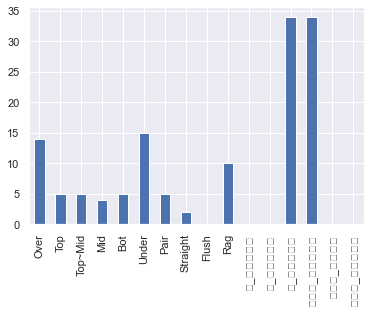

In [143]:
df_7sum.sum().plot.bar()

<AxesSubplot:>

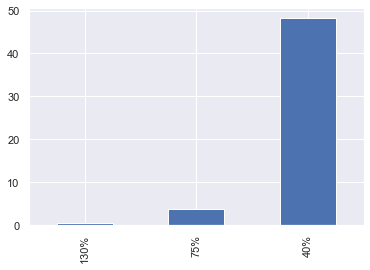

In [144]:
df_7mean.mean().plot.bar()

<AxesSubplot:>

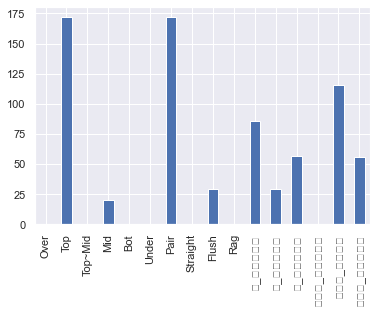

In [145]:
df_6sum.sum().plot.bar()

<AxesSubplot:>

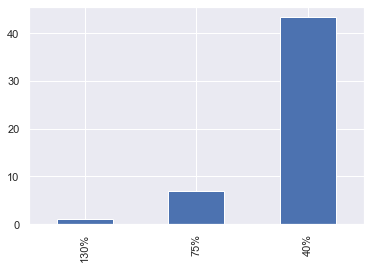

In [146]:
df_6mean.mean().plot.bar()

<AxesSubplot:>

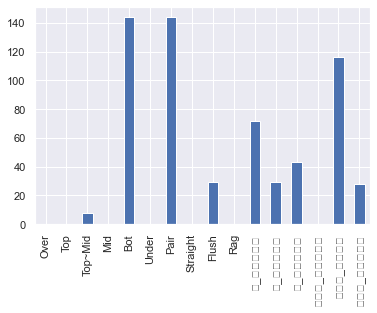

In [147]:
df_5sum.sum().plot.bar()

<AxesSubplot:>

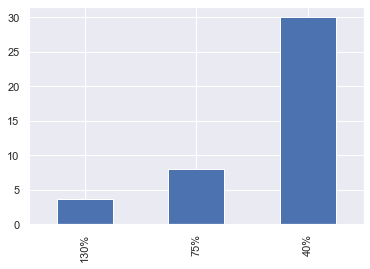

In [148]:
df_5mean.mean().plot.bar()

<AxesSubplot:>

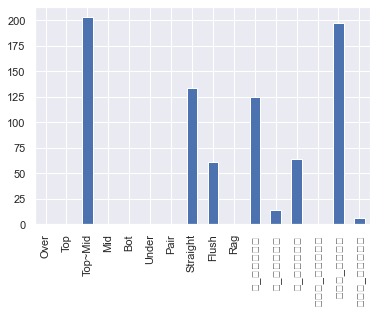

In [149]:
df_4sum.sum().plot.bar()

<AxesSubplot:>

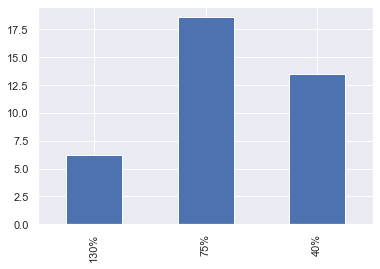

In [150]:
df_4mean.mean().plot.bar()

<AxesSubplot:>

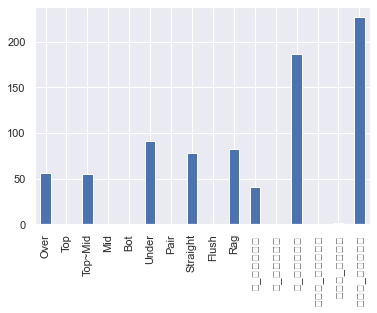

In [151]:
df_3sum.sum().plot.bar()

<AxesSubplot:>

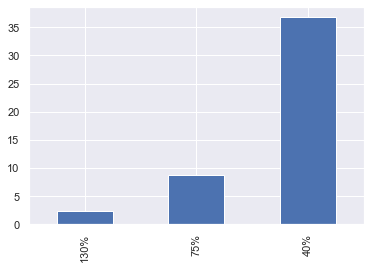

In [152]:
df_3mean.mean().plot.bar()

<AxesSubplot:>

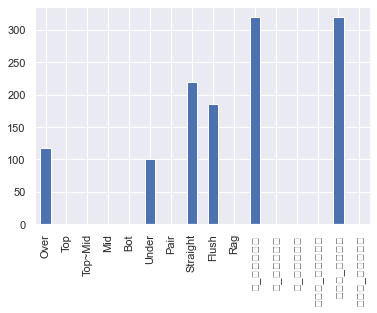

In [153]:
df_2sum.sum().plot.bar()

<AxesSubplot:>

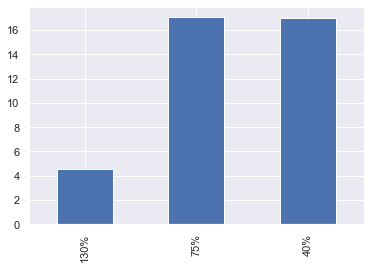

In [154]:
df_2mean.mean().plot.bar()

<AxesSubplot:>

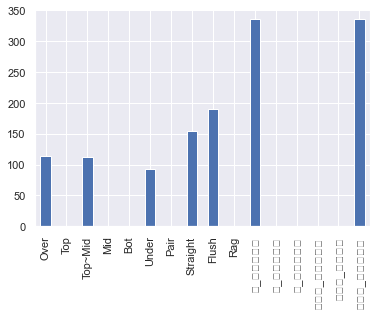

In [155]:
df_1sum.sum().plot.bar()

<AxesSubplot:>

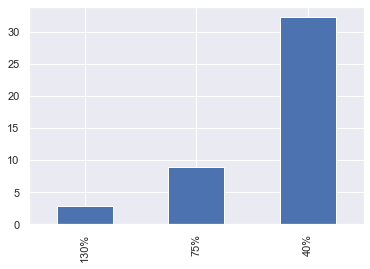

In [156]:
df_1mean.mean().plot.bar()

<AxesSubplot:>

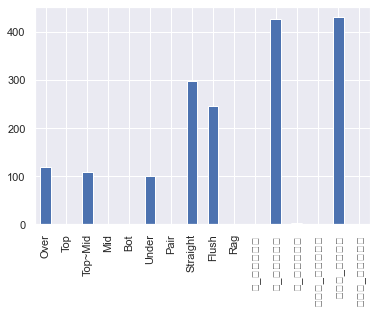

In [157]:
df_0sum.sum().plot.bar()

<AxesSubplot:>

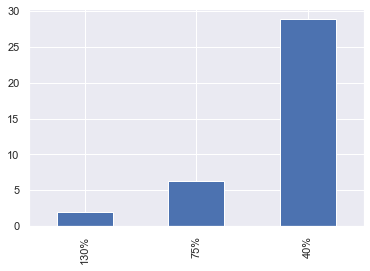

In [158]:
df_0mean.mean().plot.bar()

In [159]:
df2

Over  Top  Top~Mid  Mid  Bot  Under  Pair  Straight  Flush  Rag  \
Flop_Turn                                                                    
AAAA          0    1        0    0    1      0     1         0      0    0   
AAAH          0    0        1    0    0      1     0         1      0    0   
AAAL          0    0        1    0    0      1     0         0      0    0   
AAAM          0    0        1    0    0      1     0         0      0    0   
AAAU          0    0        1    0    0      1     0         0      0    0   
AAAU          0    0        1    0    0      1     0         1      0    0   
AAHA          0    1        0    0    0      0     1         0      0    0   
AAHA          0    1        0    0    0      0     1         0      0    0   
AAHH          0    0        1    0    0      0     0         1      0    0   
AAHH          0    0        1    0    0      0     0         1      0    0   
AAHH          0    0        1    0    0      0     0         1      1    0   
AAHH          0    0        1    0    0      1     0         1      0    0   
AAHH          0    0        1    0    0      1     0         1      0    0   
AAHH          0    0        1    0    0      1     0         1      1    0   
AAHH          0    0        1    0    1      0     1         0      0    0   
AAHH          0    0        1    0    1      0     1         0      0    0   
AAHL          0    0        1    0    0      1     0         0      0    0   
AAHL          0    0        1    0    0      1     0         0      0    0   
AAHL          0    0        1    0    0      1     0         0      1    0   
AAHM          0    0        1    0    0      1     0         0      0    0   
AAHM          0    0        1    0    0      1     0         0      0    0   
AAHM          0    0        1    0    0      1     0         0      1    0   
AAHU          0    0        1    0    0      1     0         0      0    0   
AAHU          0    0        1    0    0      1     0         0      0    0   
AAHU          0    0        1    0    0      1     0         0      1    0   
AAHU          0    0        1    0    0      1     0         1      0    0   
AAHU          0    0        1    0    0      1     0         1      0    0   
AAHU          0    0        1    0    0      1     0         1      1    0   
AALA          0    1        0    0    0      0     1         0      0    0   
AALA          0    1        0    0    0      0     1         0      0    0   
AALH          0    0        1    0    0      0     0         0      0    0   
AALH          0    0        1    0    0      0     0         0      0    0   
AALH          0    0        1    0    0      0     0         0      1    0   
AALL          0    0        1    0    0      0     0         1      0    0   
AALL          0    0        1    0    0      0     0         1      0    0   
AALL          0    0        1    0    0      0     0         1      1    0   
AALL          0    0        1    0    0      1     0         1      0    0   
AALL          0    0        1    0    0      1     0         1      0    0   
AALL          0    0        1    0    0      1     0         1      1    0   
AALL          0    0        1    0    1      0     1         0      0    0   
AALL          0    0        1    0    1      0     1         0      0    0   
AALM          0    0        1    0    0      0     0         0      0    0   
AALM          0    0        1    0    0      0     0         0      0    0   
AALM          0    0        1    0    0      0     0         0      1    0   
AALU          0    0        1    0    0      0     0         0      0    0   
AALU          0    0        1    0    0      0     0         0      0    0   
AALU          0    0        1    0    0      0     0         0      1    0   
AAMA          0    1        0    0    0      0     1         0      0    0   
AAMA          0    1        0    0    0      0     1         0      0    0   
AAMH          0    0        1    

In [160]:
df2.mean()

Over          0.209241
Top           0.077158
Top~Mid       0.214473
Mid           0.073235
Bot           0.077158
Under         0.227986
Pair          0.202703
Straight      0.431997
Flush         0.335222
Rag           0.105493
130%          3.390951
75%          10.875280
40%          27.912966
check        57.820743
色_ツートーン       0.480384
色_モノトーン       0.252398
色_レインボー       0.267219
ボード_トリップス     0.014821
ボード_ペアなし      0.687881
ボード_ペアボード     0.297297
cluster       3.553618
dtype: float64